# DATA process

In [ ]:
# prompt: show the information about the columns of all csv file in directory "Article urgent Azza/inputMatrix" and "Article urgent Azza/output"

import pandas as pd

def get_column_info(path):
  column_info = {}
  for filename in os.listdir(path):
    if filename.endswith(".csv"):
      file_path = os.path.join(path, filename)
      df = pd.read_csv(file_path)
      column_info[filename] = {
          "columns": list(df.columns)
      }
  return column_info

input_column_info = get_column_info(input_path)
output_column_info = get_column_info(output_path)

print("Input CSV files:")
for filename, info in input_column_info.items():
  print(f"- {filename}:")
  for column in info["columns"]:
    print(f"  - {column}")

print("\nOutput CSV files:")
for filename, info in output_column_info.items():
  print(f"- {filename}:")
  for column in info["columns"]:
    print(f"  - {column}")


In [ ]:
import pandas as pd

df = pd.read_csv("data/Combined_Clean_LLML_Acc_cycles_col1.csv")

In [ ]:
# prompt: show the information of all csv file in directory "Article urgent Azza/inputMatrix" and "Article urgent Azza/output"

import os

input_path = "data"
output_path = "data"

def get_csv_info(path):
  csv_files = []
  for filename in os.listdir(path):
    if filename.endswith(".csv"):
      file_path = os.path.join(path, filename)
      file_size = os.path.getsize(file_path)
      csv_files.append({
          "filename": filename,
          "size": file_size
      })
  return csv_files

input_csv_info = get_csv_info(input_path)
output_csv_info = get_csv_info(output_path)

print("Input CSV files:")
for csv in input_csv_info:
  print(f"- {csv['filename']} ({csv['size']} bytes)")

print("\nOutput CSV files:")
for csv in output_csv_info:
  print(f"- {csv['filename']} ({csv['size']} bytes)")


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = pd.read_csv("data/Combined_StepL_col1.csv")
df.info()


In [ ]:
df.head()

In [ ]:
# prompt: I want to combine the data in the files Combined_Clean_LLML_Acc_cycles_col1.csv,  Combined_Clean_LLML_Acc_cycles_col2.csv,  Combined_Clean_LLML_Acc_cycles_col3.csv
# by making them column in one csv file, the first file which correspond to first colum named LLML_ACC_X, the second LLML_ACC_Y, and tyhe third LLML_ACC_Z,
# note that the data in each file is a matrix without any column name,

import os
import pandas as pd

input_path = "data"

def combine_csv_files(path):
  combined_df = pd.DataFrame()
  for filename in os.listdir(path):
    if filename.endswith(".csv"):
      file_path = os.path.join(path, filename)
      df = pd.read_csv(file_path, header=None)
      combined_df = pd.concat([combined_df, df], axis=1)
  combined_df.columns = ["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]
  return combined_df

combined_df = combine_csv_files(input_path)

# Save the combined DataFrame to a new CSV file
output_path = "data"
combined_df.to_csv(os.path.join(output_path, "Combined_LLML_Acc_cycles.csv"), index=False)



In [ ]:
# prompt: read the Combined_Clean_LLML_Acc_cycles_col1.csv,  Combined_Clean_LLML_Acc_cycles_col2.csv,  Combined_Clean_LLML_Acc_cycles_col3.csv
# as numpy array then flatten each one

import numpy as np

# Read the CSV files as numpy arrays
col1_array = np.genfromtxt("data/Combined_Clean_LLML_Acc_cycles_col1.csv", delimiter=",")
col2_array = np.genfromtxt("data/Combined_Clean_LLML_Acc_cycles_col2.csv", delimiter=",")
col3_array = np.genfromtxt("data/Combined_Clean_LLML_Acc_cycles_col3.csv", delimiter=",")
step_x_L_array = np.genfromtxt("data/Combined_StepL_col1.csv", delimiter=",")
step_y_L_array = np.genfromtxt("data/Combined_StepL_col2.csv", delimiter=",")
step_z_L_array = np.genfromtxt("data/Combined_StepL_col3.csv", delimiter=",")

# Flatten each array
flattened_col1 = col1_array.flatten('F')
flattened_col2 = col2_array.flatten('F')
flattened_col3 = col3_array.flatten('F')
flattened_step_x_L = step_x_L_array.flatten('F')
flattened_step_y_L = step_y_L_array.flatten('F')
flattened_step_z_L = step_z_L_array.flatten('F')
# Print the flattened arrays
print("Flattened col1 array:", flattened_col1)
print("Flattened col2 array:", flattened_col2)
print("Flattened col3 array:", flattened_col3)


In [ ]:
print("Flattened col1 array:", flattened_col1.shape)
print("Flattened col2 array:", flattened_col2.shape)
print("Flattened col3 array:", flattened_col3.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(25):  # Adjust range if you have more or fewer segments
    color = generate_random_color()  # Generate a random color
    plt.plot(x, flattened_step_x_L[i*1000:(i+1)*1000], color=color)

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: create a new dataframe, with three colum using flattened_col1
# flattened_col2
# flattened_col3
# where the flattened_col1 represent a column named LLML_ACC_X,  flattened_col2 represent a column named LLML_ACC_Y and flattened_col3 represent LLML_ACC_Z

import pandas as pd

# Create a new DataFrame
Lx_step_frame = pd.DataFrame({
    "LLML_ACC_X": flattened_col1,
    "LLML_ACC_Y": flattened_col2,
    "LLML_ACC_Z": flattened_col3,
    "StepL_X": flattened_step_x_L

})

Ly_step_frame = pd.DataFrame({
    "LLML_ACC_X": flattened_col1,
    "LLML_ACC_Y": flattened_col2,
    "LLML_ACC_Z": flattened_col3,
    "StepL_Y": flattened_step_y_L
})

Lz_step_frame = pd.DataFrame({
    "LLML_ACC_X": flattened_col1,
    "LLML_ACC_Y": flattened_col2,
    "LLML_ACC_Z": flattened_col3,
    "StepL_Z": flattened_step_z_L

})



# Print the new DataFrame
print(Lx_step_frame.head())
print(Lx_step_frame.info())
print(Ly_step_frame.head())
print(Ly_step_frame.info())
print(Lz_step_frame.head())
print(Lz_step_frame.info())


In [ ]:
# prompt: save the three dataframes to files

Lx_step_frame.to_csv("data/Combined_StepL_X.csv", index=False)
Ly_step_frame.to_csv("data/Combined_StepL_Y.csv", index=False)
Lz_step_frame.to_csv("data/Combined_StepL_Z.csv", index=False)


In [ ]:
col1_array = np.genfromtxt("data/Combined_Clean_RLML_Acc_cycles_col1.csv", delimiter=",")
col2_array = np.genfromtxt("data/Combined_Clean_RLML_Acc_cycles_col2.csv", delimiter=",")
col3_array = np.genfromtxt("data/Combined_Clean_RLML_Acc_cycles_col3.csv", delimiter=",")
step_x_R_array = np.genfromtxt("data/Combined_StepR_col1.csv", delimiter=",")
step_y_R_array = np.genfromtxt("data/Combined_StepR_col2.csv", delimiter=",")
step_z_R_array = np.genfromtxt("data/Combined_StepR_col3.csv", delimiter=",")

# Flatten each array
flattened_col1 = col1_array.flatten('F')
flattened_col2 = col2_array.flatten('F')
flattened_col3 = col3_array.flatten('F')
flattened_step_x_R = step_x_R_array.flatten('F')
flattened_step_y_R = step_y_R_array.flatten('F')
flattened_step_z_R = step_z_R_array.flatten('F')


Rx_step_frame = pd.DataFrame({
    "RLML_ACC_X": flattened_col1,
    "RLML_ACC_Y": flattened_col2,
    "RLML_ACC_Z": flattened_col3,
    "StepR_X": flattened_step_x_R

})

Ry_step_frame = pd.DataFrame({
    "RLML_ACC_X": flattened_col1,
    "RLML_ACC_Y": flattened_col2,
    "RLML_ACC_Z": flattened_col3,
    "StepR_Y": flattened_step_y_R
})

Rz_step_frame = pd.DataFrame({
    "RLML_ACC_X": flattened_col1,
    "RLML_ACC_Y": flattened_col2,
    "RLML_ACC_Z": flattened_col3,
    "StepR_Z": flattened_step_z_R

})

Rx_step_frame.to_csv("data/Combined_StepR_X.csv", index=False)
Ry_step_frame.to_csv("data/Combined_StepR_Y.csv", index=False)
Rz_step_frame.to_csv("data/Combined_StepR_Z.csv", index=False)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
# y_test = np.sin(x)  # Example function; replace with your actual data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
# features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepR_X"]

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    color = generate_random_color()  # Generate a random color
    plt.plot(x, labels[i*1000:(i+1)*1000], color="blue")
# for i in range(15):  # Adjust range if you have more or fewer segments
#     # color = generate_random_color()  # Generate a random color
#     plt.plot(x, pred_R_X_DT[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: write a simple random forst model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a random forest model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("R^2 score:", score)


# Modeling

### Imports

In [ ]:
# TODO: - Add the following metrics for each method: R2, MedAE
#       - ADD SVM and CNN 1D
#       - ADD a model for time series data
!pip install catboost
!pip install xgboost

In [ ]:
!pip install numpy

In [ ]:
!which pip

In [1]:
!pip3 install torch torchvision torchaudio

  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (

In [1]:
import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_test_split(features, labels, test_size=0.2):
    """
    Custom implementation of train-test split where the last 'test_size' proportion
    of the data is used for testing and the rest is used for training.

    Parameters:
    - features: numpy array or list, containing the features
    - labels: numpy array or list, containing the labels
    - test_size: float, proportion of the dataset to include in the test split (default: 0.2)

    Returns:
    - X_train: numpy array or list, features for training
    - X_test: numpy array or list, features for testing
    - y_train: numpy array or list, labels for training
    - y_test: numpy array or list, labels for testing
    """
    # Calculate the index to split the data
    split_index = int((1 - test_size) * len(features))
    
    # Split the data
    X_train, X_test = features[:split_index], features[split_index:]
    y_train, y_test = labels[:split_index], labels[split_index:]
    
    return X_train, X_test, y_train, y_test



## DEcision Tree


### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step LEFT on axis X:", score)
y_test_L_X = y_test
pred_L_X_DT = model.predict(X_test)
L_X_DT_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_DT))
L_X_DT_mae = mean_absolute_error(y_test_L_X, pred_L_X_DT)
print("RMSE for predicting step LEFT on axis X:", L_X_DT_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_DT_mae)


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_DT_rmse,
    'MAE': L_X_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision Tree Model for Left on X axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_LEFT_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_Y", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step LEFT on axis Y:", score)
y_test_L_Y = y_test
pred_L_Y_DT = model.predict(X_test)
L_Y_DT_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_DT))
L_Y_DT_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_DT)
print("RMSE for predicting step LEFT on axis Y:", L_Y_DT_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_DT_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_DT_rmse/10,
    'MAE': L_Y_DT_mae/10
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Left on Y axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_LEFT_Y.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_Z", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
# TODO: check how train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
y_test_L_Z = y_test
pred_L_Z_DT = model.predict(X_test)
L_Z_DT_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_DT))
L_Z_DT_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_DT)
print("RMSE for predicting step LEFT on axis Z:", L_Z_DT_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_DT_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_DT_rmse,
    'MAE': L_Z_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Left on Z axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_LEFT_Z.png')
plt.show()

### Predicting on Right

In [2]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test

import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
y_test_R_X = y_test
pred_R_X_DT = model.predict(X_test)
R_X_DT_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_DT))
R_X_DT_mae = mean_absolute_error(y_test_R_X, pred_R_X_DT)
# MedAE (Median Absolute Error)
R_X_DT_medAE = np.median(np.abs(y_test_R_X - pred_R_X_DT))

# R² (R-squared)
R_X_DT_r2 = r2_score(y_test_R_X, pred_R_X_DT)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_DT_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_DT_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_DT_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_DT_r2)

MSE for predicting step R on axis X: 0.03920226167510832
RMSE for predicting step RIGHT on axis X: 0.037924413165592606
MAE for predicting step RIGHT on axis X: 0.03328348738365148
MedAE for predicting step RIGHT on axis X: 0.03302125468681308
R² for predicting step RIGHT on axis X: 0.03920226167510832


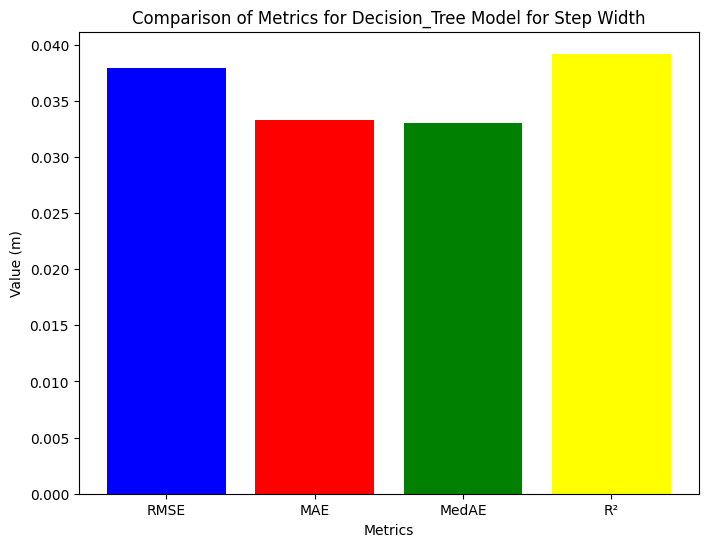

In [3]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_DT_rmse,
    'MAE': R_X_DT_mae,
    'MedAE': R_X_DT_medAE,
    'R²': R_X_DT_r2,
    
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Decision_Tree Model for Step Width')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_Right_x.png')
plt.show()

/tmp/ipykernel_961194/2594526864.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


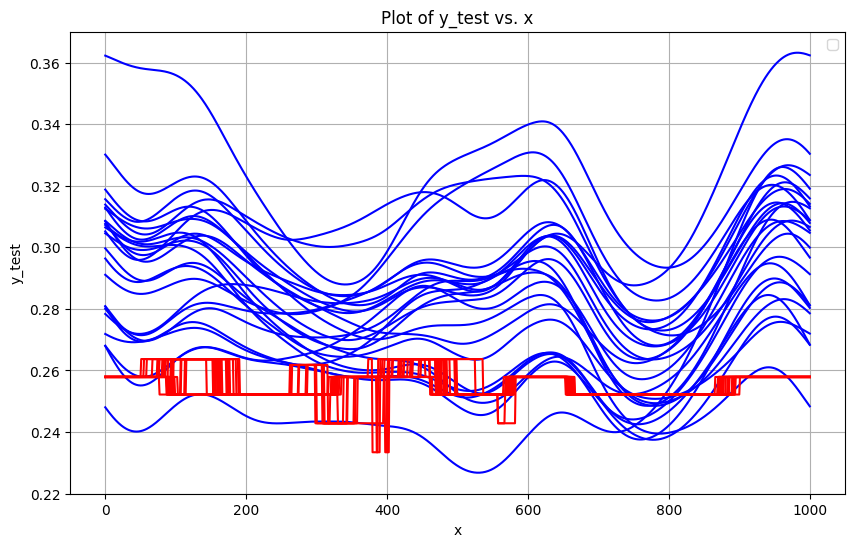

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
# y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(25):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test[i*1000:(i+1)*1000], color="blue")
for i in range(25):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_DT[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
y_test_R_Y = y_test
pred_R_Y_DT = model.predict(X_test)
R_Y_DT_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_DT))
R_Y_DT_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_DT)

# MedAE (Median Absolute Error)
R_Y_DT_medAE = np.median(np.abs(y_test_R_Y - pred_R_Y_DT))

# R² (R-squared)
R_Y_DT_r2 = r2_score(y_test_R_Y, pred_R_Y_DT)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_DT_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_DT_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_DT_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_DT_r2)


MSE for predicting step R on axis Y: 0.8366106738071731
RMSE for predicting step RIGHT on axis X: 0.21399974628642557
MAE for predicting step RIGHT on axis X: 0.15658569487373963
MedAE for predicting step RIGHT on axis X: 0.10304150692013986
R² for predicting step RIGHT on axis X: 0.8366106738071731


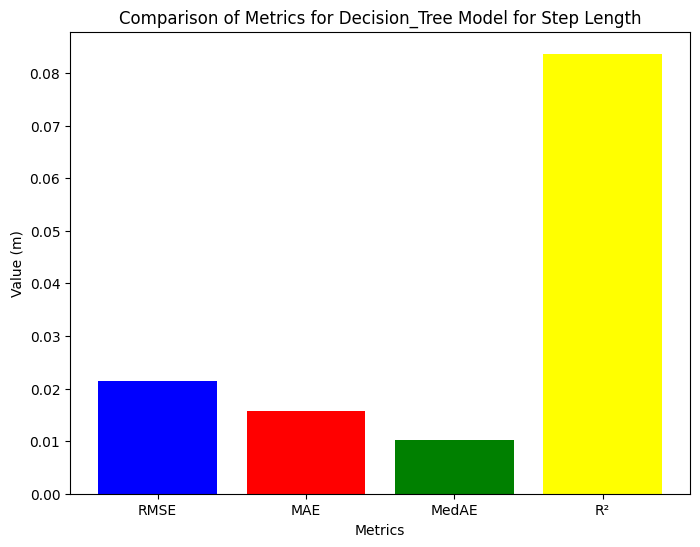

In [6]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_DT_rmse/10,
    'MAE': R_Y_DT_mae/10,
    'MedAE': R_Y_DT_medAE/10,
    'R²': R_Y_DT_r2/10,
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Decision_Tree Model for Step Length')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_Right_Y.png')
plt.show()

/tmp/ipykernel_961194/3423668104.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


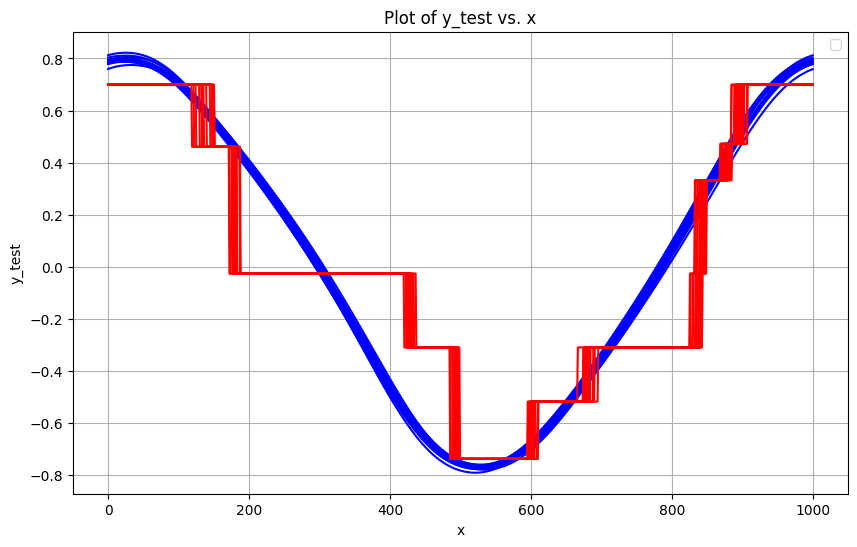

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Y[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_DT[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
y_test_R_Z = y_test
pred_R_Z_DT = model.predict(X_test)
R_Z_DT_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_DT))
R_Z_DT_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_DT)
# MedAE (Median Absolute Error)
R_Z_DT_medAE = np.median(np.abs(y_test_R_Z - pred_R_Z_DT))

# R² (R-squared)
R_Z_DT_r2 = r2_score(y_test_R_Z, pred_R_Z_DT)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Z_DT_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Z_DT_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Z_DT_medAE)
print("R² for predicting step RIGHT on axis X:", R_Z_DT_r2)


MSE for predicting step R on axis Z: 0.8289528579800683
RMSE for predicting step RIGHT on axis Z: 0.043316916117925874
MAE for predicting step RIGHT on axis Z: 0.032054464005679094


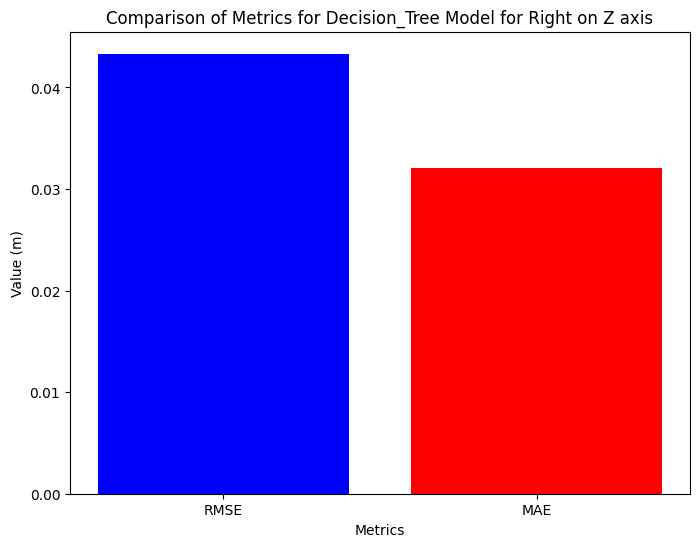

In [15]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_DT_rmse,
    'MAE': R_Z_DT_mae,
    'MedAE': R_Z_DT_medAE,
    'R²': R_Z_DT_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Decision_Tree Model for Right on Z axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_Right_Z.png')
plt.show()

/tmp/ipykernel_1197189/2441822058.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


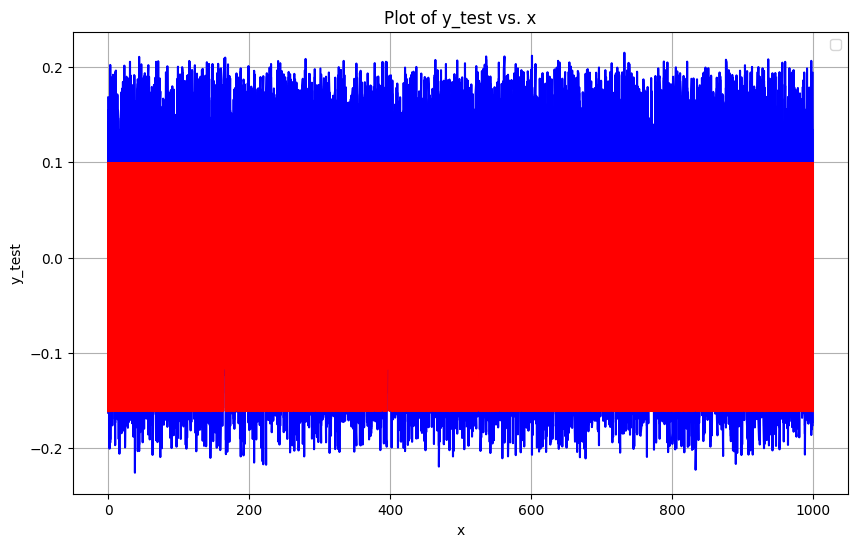

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Z[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Z_DT[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


## Gradiant Boosting


### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
y_test_L_X = y_test
pred_L_X_GB = model.predict(X_test)
L_X_GB_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_GB))
L_X_GB_mae = mean_absolute_error(y_test_L_X, pred_L_X_GB)
print("RMSE for predicting step LEFT on axis X:", L_X_GB_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_GB_mae)


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_GB_rmse,
    'MAE': L_X_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Left on X axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
y_test_L_Y = y_test
pred_L_Y_GB = model.predict(X_test)
L_Y_GB_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_GB))
L_Y_GB_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_GB)
print("RMSE for predicting step LEFT on axis Y:", L_Y_GB_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_GB_mae)


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_GB_rmse/10,
    'MAE': L_Y_GB_mae/10
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Left on Y axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
y_test_L_Z = y_test
pred_L_Z_GB = model.predict(X_test)
L_Z_GB_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_GB))
L_Z_GB_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_GB)
print("RMSE for predicting step LEFT on axis Z:", L_Z_GB_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_GB_mae)


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_GB_rmse,
    'MAE': L_Z_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Left on Z axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
y_test_R_X = y_test
pred_R_X_GB = model.predict(X_test)
R_X_GB_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_GB))
R_X_GB_mae = mean_absolute_error(y_test_R_X, pred_R_X_GB)
R_X_GB_medAE = np.median(np.abs(y_test_R_X - pred_R_X_GB))

# R² (R-squared)
R_X_GB_r2 = r2_score(y_test_R_X, pred_R_X_GB)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_GB_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_GB_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_GB_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_GB_r2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_X[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_GB[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_GB_rmse,
    'MAE': R_X_GB_mae,
    'MedAE': R_X_GB_medAE,
    'R²': R_X_GB_r2,
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Step Width')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
y_test_R_Y = y_test
pred_R_Y_GB = model.predict(X_test)
R_Y_GB_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_GB))
R_Y_GB_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_GB)
R_Y_GB_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_GB))

# R² (R-squared)
R_Y_GB_r2 = r2_score(y_test_R_X, pred_R_Y_GB)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_GB_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_GB_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_GB_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_GB_r2)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_GB_rmse/10,
    'MAE': R_Y_GB_mae/10,
    'MedAE': R_Y_GB_medAE/10,
    'R²': R_Y_GB_r2/10,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Step Length')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Y[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_GB[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
y_test_Z_Z = y_test
pred_R_Z_GB = model.predict(X_test)
R_Z_GB_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_GB))
R_Z_GB_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_GB)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_GB_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_GB_mae)

MSE for predicting step R on axis Z: 0.7562831046593973
RMSE for predicting step RIGHT on axis Z: 0.12172300275518193
MAE for predicting step RIGHT on axis Z: 0.09983640788555798


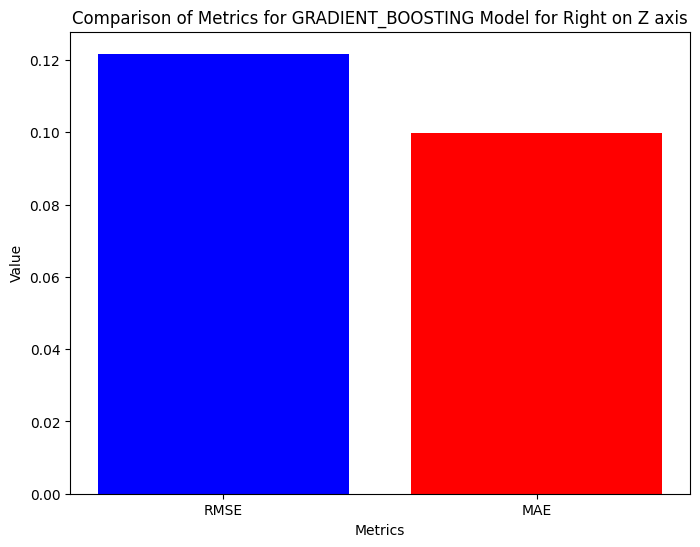

In [24]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_GB_rmse,
    'MAE': R_Z_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Right on Z axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Right_Z.png')
plt.show()

/tmp/ipykernel_1197189/1808930477.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


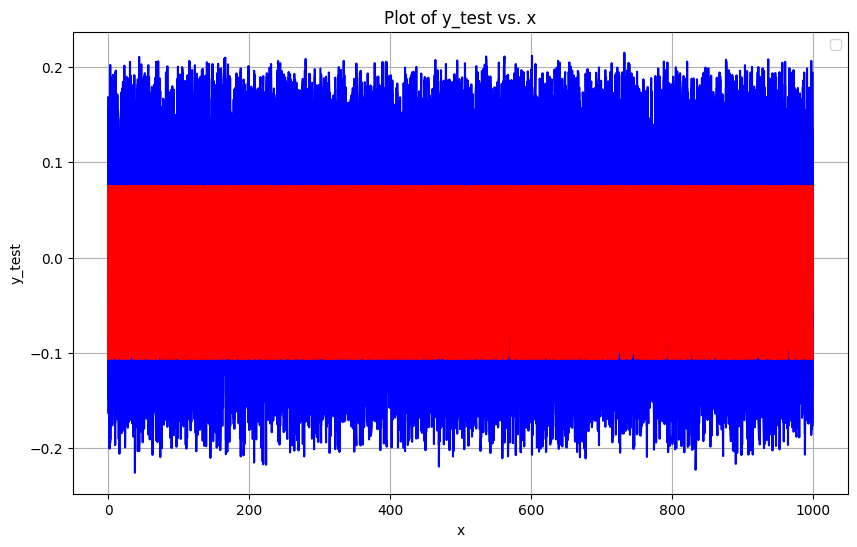

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Z[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Z_GB[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


## Elastic Net Regression


### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

model = ElasticNet(alpha=0.1, l1_ratio=0.5)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_ENR = model.predict(X_test)
L_X_ENR_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_ENR))
L_X_ENR_mae = mean_absolute_error(y_test_L_X, pred_L_X_ENR)
print("RMSE for predicting step LEFT on axis X:", L_X_ENR_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_ENR_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_ENR = model.predict(X_test)
L_Y_ENR_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_ENR))
L_Y_ENR_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_ENR)
print("RMSE for predicting step LEFT on axis Y:", L_Y_ENR_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_ENR_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_ENR = model.predict(X_test)
L_Z_ENR_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_ENR))
L_Z_ENR_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_ENR)
print("RMSE for predicting step LEFT on axis Z:", L_Z_ENR_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_ENR_mae)


### Predicting on Right

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_ENR = model.predict(X_test)
R_X_ENR_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_ENR))
R_X_ENR_mae = mean_absolute_error(y_test_R_X, pred_R_X_ENR)
print("RMSE for predicting step RIGHT on axis X:", R_X_ENR_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_ENR_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_ENR = model.predict(X_test)
R_Y_ENR_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_ENR))
R_Y_ENR_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_ENR)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_ENR_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_ENR_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_ENR = model.predict(X_test)
R_Z_ENR_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_ENR))
R_Z_ENR_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_ENR)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_ENR_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_ENR_mae)


## LASSO

### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_LASSO = model.predict(X_test)
L_X_LASSO_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_LASSO))
L_X_LASSO_mae = mean_absolute_error(y_test_L_X, pred_L_X_LASSO)
print("RMSE for predicting step LEFT on axis X:", L_X_LASSO_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_LASSO_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_LASSO = model.predict(X_test)
L_Y_LASSO_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_LASSO))
L_Y_LASSO_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_LASSO)
print("RMSE for predicting step LEFT on axis Y:", L_Y_LASSO_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_LASSO_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_LASSO = model.predict(X_test)
L_Z_LASSO_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_LASSO))
L_Z_LASSO_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_LASSO)
print("RMSE for predicting step LEFT on axis Z:", L_Z_LASSO_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_LASSO_mae)


### Predicting on Right

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_LASSO = model.predict(X_test)
R_X_LASSO_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_LASSO))
R_X_LASSO_mae = mean_absolute_error(y_test_R_X, pred_R_X_LASSO)
print("RMSE for predicting step RIGHT on axis X:", R_X_LASSO_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_LASSO_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_LASSO = model.predict(X_test)
R_Y_LASSO_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_LASSO))
R_Y_LASSO_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_LASSO)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_LASSO_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_LASSO_mae)


In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_LASSO = model.predict(X_test)
R_Z_LASSO_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_LASSO))
R_Z_LASSO_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_LASSO)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_LASSO_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_LASSO_mae)

## Linear Regression

### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_LR = model.predict(X_test)
L_X_LR_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_LR))
L_X_LR_mae = mean_absolute_error(y_test_L_X, pred_L_X_LR)
print("RMSE for predicting step LEFT on axis X:", L_X_LR_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_LR_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_LR_rmse,
    'MAE': L_X_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Left on X axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_LR = model.predict(X_test)
L_Y_LR_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_LR))
L_Y_LR_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_LR)
print("RMSE for predicting step LEFT on axis Y:", L_Y_LR_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_LR_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_LR_rmse/10,
    'MAE': L_Y_LR_mae/10
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Left on Y axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_LR = model.predict(X_test)
L_Z_LR_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_LR))
L_Z_LR_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_LR)
print("RMSE for predicting step LEFT on axis Z:", L_Z_LR_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_LR_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_LR_rmse,
    'MAE': L_Z_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Left on Z axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_LR = model.predict(X_test)
R_X_LR_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_LR))
R_X_LR_mae = mean_absolute_error(y_test_R_X, pred_R_X_LR)
R_X_LR_medAE = np.median(np.abs(y_test_R_X - pred_R_X_LR))

# R² (R-squared)
R_X_LR_r2 = r2_score(y_test_R_X, pred_R_X_LR)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_LR_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_LR_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_LR_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_LR_r2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
# y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(100):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test[i*1000:(i+1)*1000], color="blue")
for i in range(100):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_LR[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_LR_rmse,
    'MAE': R_X_LR_mae,
    'MedAE': R_X_LR_medAE,
    'R²': R_X_LR_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Linear_regression Model for Step Width')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Right_X.png')
plt.show()

/tmp/ipykernel_1197189/915770286.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


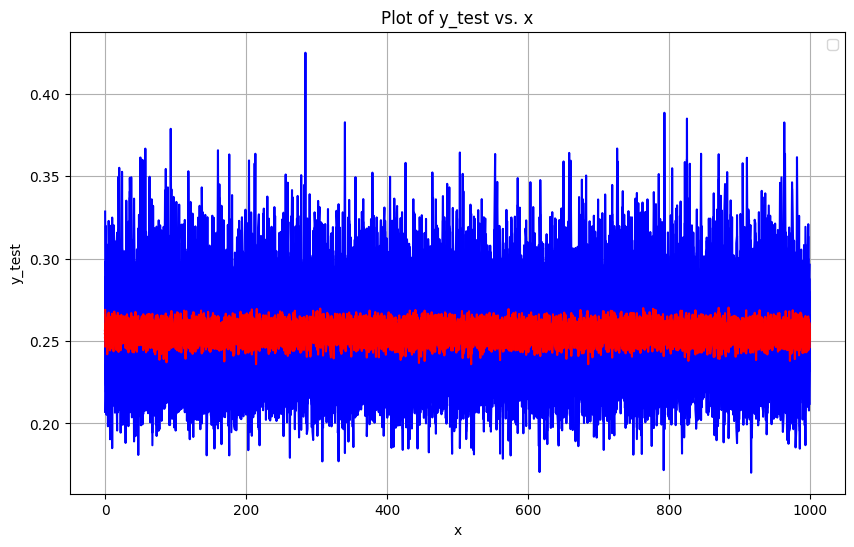

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_X[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_LR[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")
from sklearn.linear_model import HuberRegressor
# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = HuberRegressor(epsilon=1,max_iter=1000,alpha=0.0001)
# model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
y_test_R_Y=y_test
pred_R_Y_LR = model.predict(X_test)
R_Y_LR_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_LR))
R_Y_LR_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_LR)
R_Y_LR_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_LR))

# R² (R-squared)
R_Y_LR_r2 = r2_score(y_test_R_X, pred_R_Y_LR)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_LR_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_LR_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_LR_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_LR_r2)

MSE for predicting step R on axis Y: 0.6622544290736163
RMSE for predicting step RIGHT on axis Y: 0.3129347036779947
MAE for predicting step RIGHT on axis Y: 0.24336633987186504


/tmp/ipykernel_1197189/2169327658.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


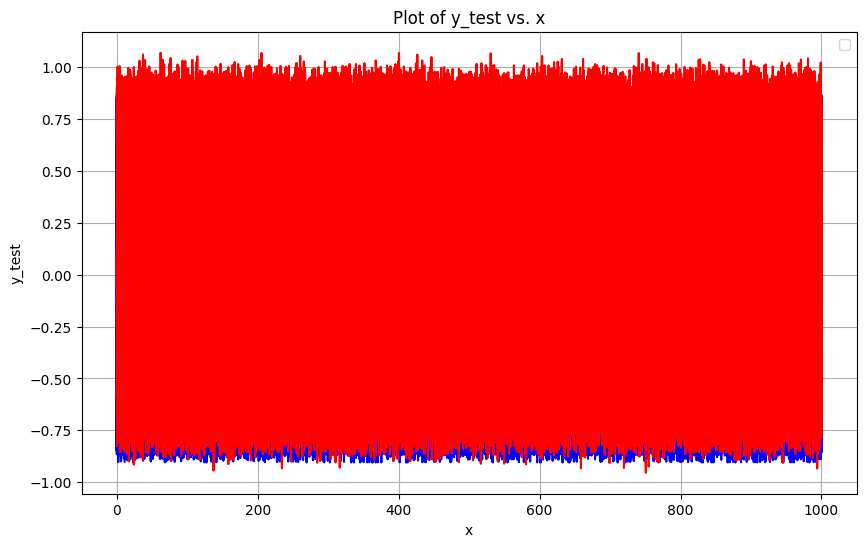

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
# y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(1700):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test[i*1000:(i+1)*1000], color="blue")
for i in range(100):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_LR[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


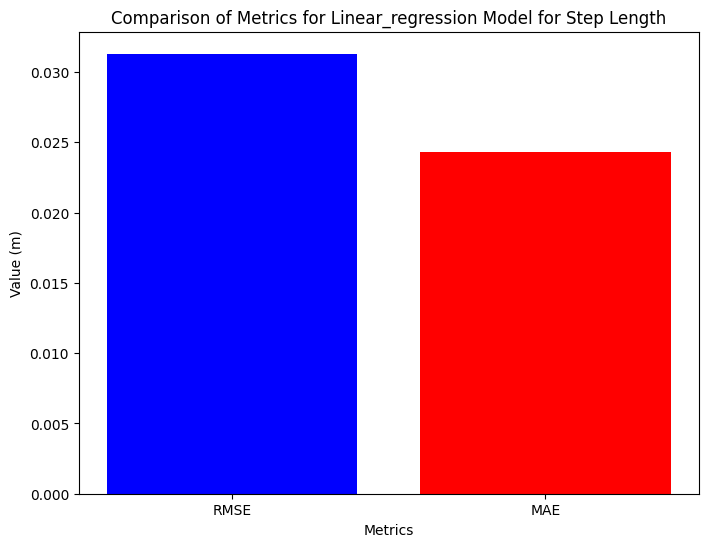

In [32]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_LR_rmse/10,
    'MAE': R_Y_LR_mae/10,
    'MedAE': R_Y_LR_medAE,
    'R²': R_Y_LR_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Linear_regression Model for Step Length')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Right_Y.png')
plt.show()

/tmp/ipykernel_1197189/3023583010.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


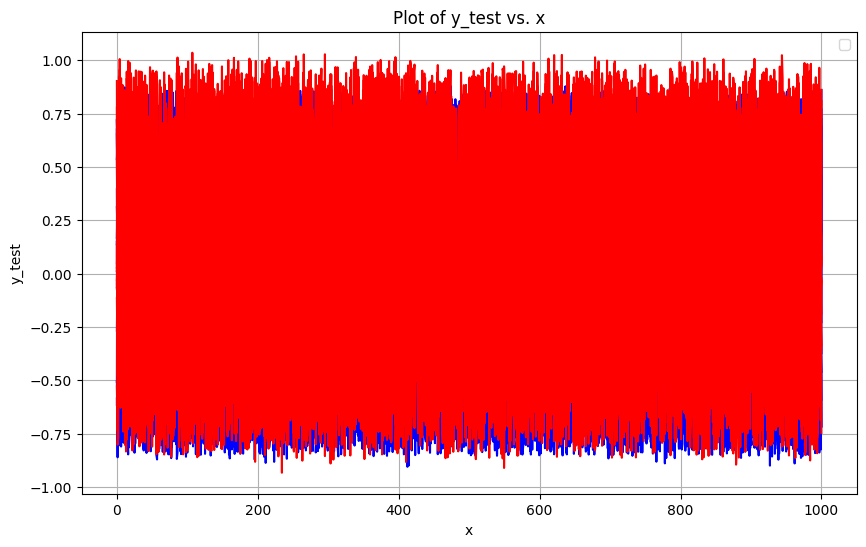

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Y[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_LR[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_LR = model.predict(X_test)
R_Z_LR_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_LR))
R_Z_LR_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_LR)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_LR_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_LR_mae)

MSE for predicting step R on axis Z: 0.33533888663955735
RMSE for predicting step RIGHT on axis Z: 0.12109924348131845
MAE for predicting step RIGHT on axis Z: 0.09837617664234727


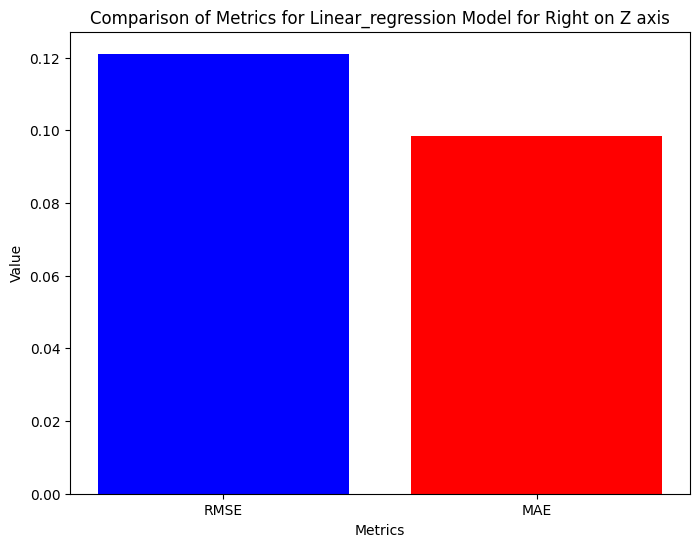

In [35]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_LR_rmse,
    'MAE': R_Z_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Right on Z axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Right_Z.png')
plt.show()

/tmp/ipykernel_1197189/1124714589.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


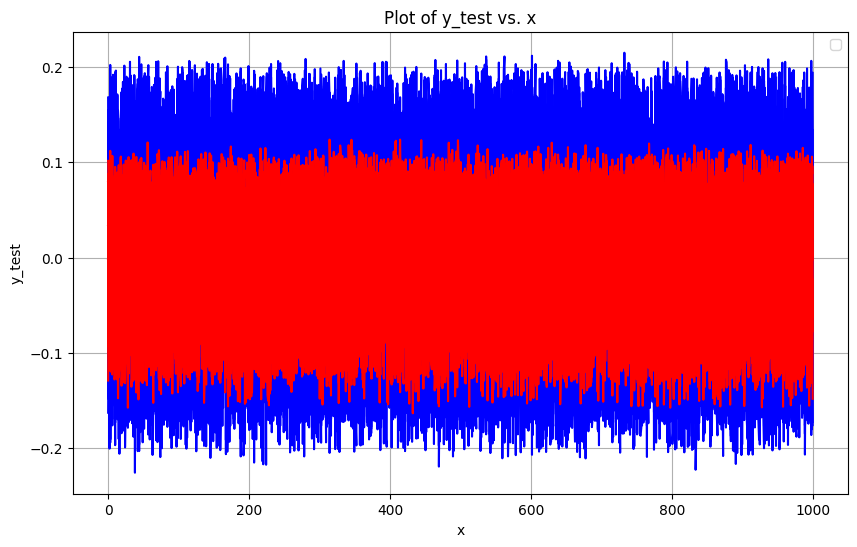

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Z[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Z_LR[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


## MLP regression (Multilayer Percptron regression)

### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Z": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_MLP = model.predict(X_test)
L_X_MLP_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_MLP))
L_X_MLP_mae = mean_absolute_error(y_test_L_X, pred_L_X_MLP)
print("RMSE for predicting step LEFT on axis X:", L_X_MLP_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_MLP_mae)


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_MLP_rmse,
    'MAE': L_X_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for MLP Model for Left on X axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_MLP = model.predict(X_test)
L_Y_MLP_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_MLP))
L_Y_MLP_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_MLP)
print("RMSE for predicting step LEFT on axis Y:", L_Y_MLP_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_MLP_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_MLP_rmse/10,
    'MAE': L_Y_MLP_mae/10
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Left on Y axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_MLP = model.predict(X_test)
L_Z_MLP_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_MLP))
L_Z_MLP_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_MLP)
print("RMSE for predicting step LEFT on axis Z:", L_Z_MLP_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_MLP_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_MLP_rmse,
    'MAE': L_Z_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Left on Z axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [37]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
y_test_R_X = y_test
pred_R_X_MLP = model.predict(X_test)
R_X_MLP_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_MLP))
R_X_MLP_mae = mean_absolute_error(y_test_R_X, pred_R_X_MLP)
# MedAE (Median Absolute Error)
R_X_MLP_medAE = np.median(np.abs(y_test_R_X - pred_R_X_MLP))

# R² (R-squared)
R_X_MLP_r2 = r2_score(y_test_R_X, pred_R_X_MLP)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_MLP_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_MLP_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_MLP_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_MLP_r2)

MSE for predicting step R on axis X: -0.002013405878165786
RMSE for predicting step RIGHT on axis X: 0.03151853763164355
MAE for predicting step RIGHT on axis X: 0.02615926172313139


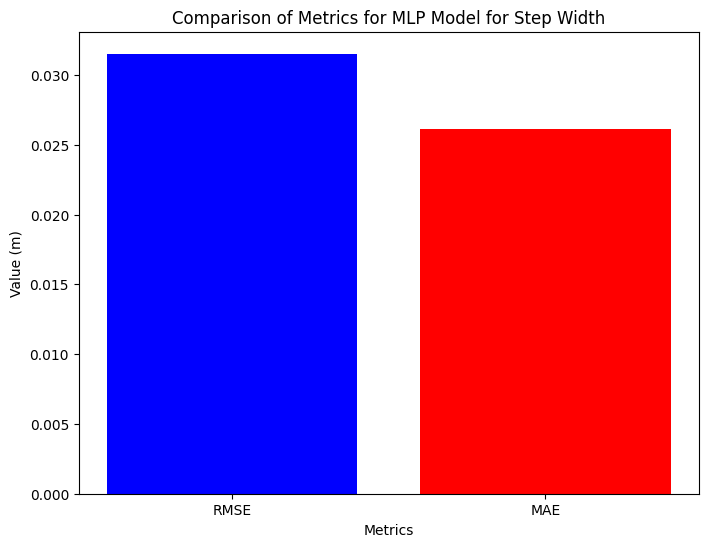

In [38]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_MLP_rmse,
    'MAE': R_X_MLP_mae,
    'MedAE': R_X_MLP_medAE,
    'R²': R_X_MLP_r2,
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for MLP Model for Step Width')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [39]:
len(pred_R_X_MLP)//1000

1767

/tmp/ipykernel_1197189/4165039312.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


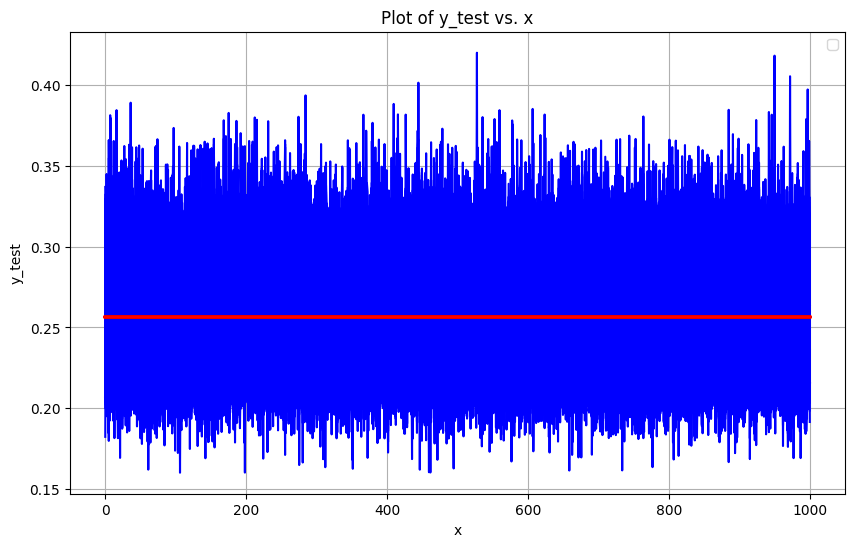

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
# y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(100):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test[i*1000:(i+1)*1000], color="blue")
for i in range(100):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_MLP[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(5, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_MLP = model.predict(X_test)
R_Y_MLP_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_MLP))
R_Y_MLP_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_MLP)
# MedAE (Median Absolute Error)
R_Y_MLP_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_MLP))

# R² (R-squared)
R_Y_MLP_r2 = r2_score(y_test_R_X, pred_R_Y_MLP)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_MLP_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_MLP_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_MLP_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_MLP_r2)

MSE for predicting step R on axis Y: 0.924294944090017
RMSE for predicting step RIGHT on axis Y: 0.748790389070855
MAE for predicting step RIGHT on axis Y: 0.6105199060481915


/tmp/ipykernel_1197189/1275539878.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


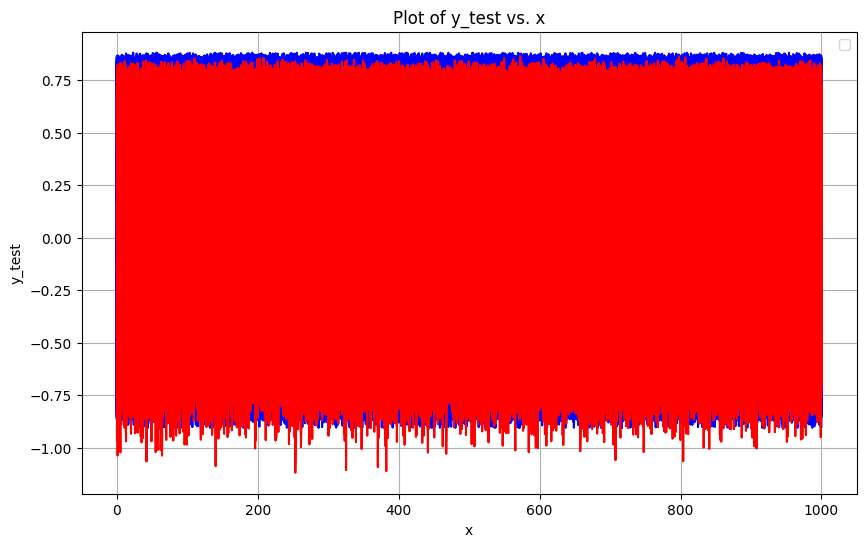

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
# y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(1500):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test[i*1000:(i+1)*1000], color="blue")
for i in range(50):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_MLP[(i*1000):((i+1)*1000)], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


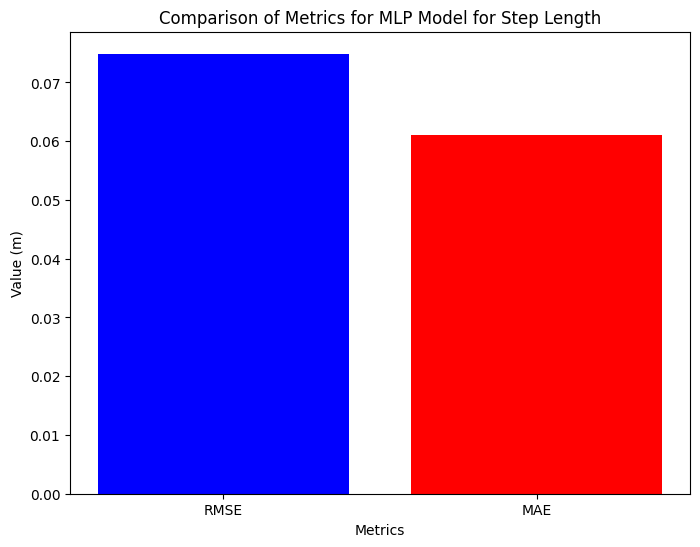

In [43]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_MLP_rmse/10,
    'MAE': R_Y_MLP_mae/10,
    'MedAE': R_Y_MLP_medAE/10,
    'R²': R_Y_MLP_r2/10,
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for MLP Model for Step Length')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Right_Y.png')
plt.show()

/tmp/ipykernel_1197189/3115079217.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


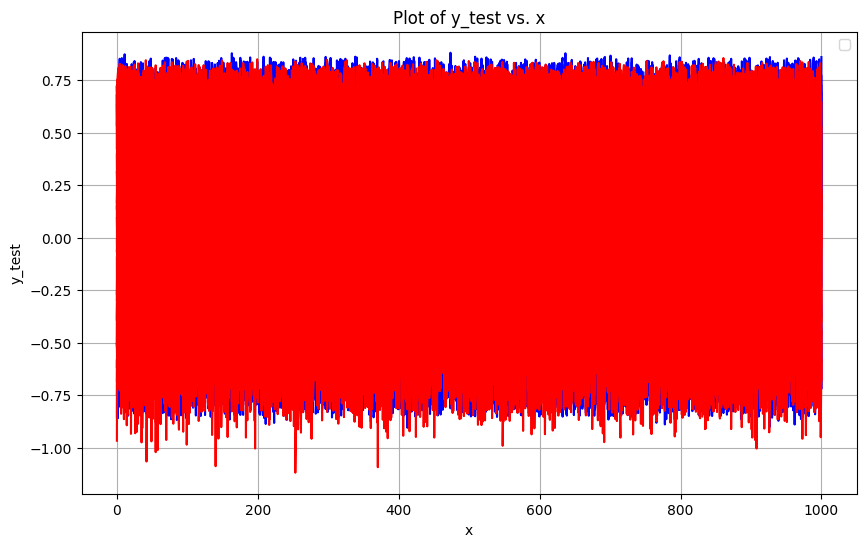

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Y[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_MLP[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_MLP = model.predict(X_test)
R_Z_MLP_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_MLP))
R_Z_MLP_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_MLP)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_MLP_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_MLP_mae)

MSE for predicting step R on axis Z: 0.7754400752079238
RMSE for predicting step RIGHT on axis Z: 0.13788206512854234
MAE for predicting step RIGHT on axis Z: 0.11232195501112636


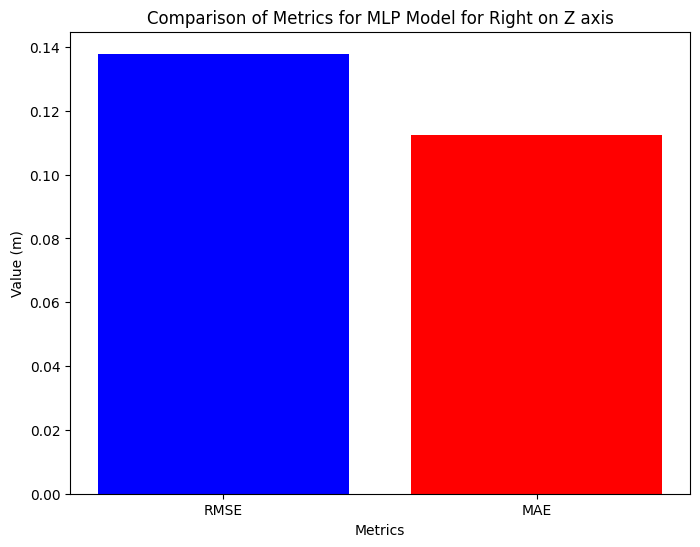

In [46]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_MLP_rmse,
    'MAE': R_Z_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for MLP Model for Right on Z axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Right_Z.png')
plt.show()

/tmp/ipykernel_1197189/2574747675.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


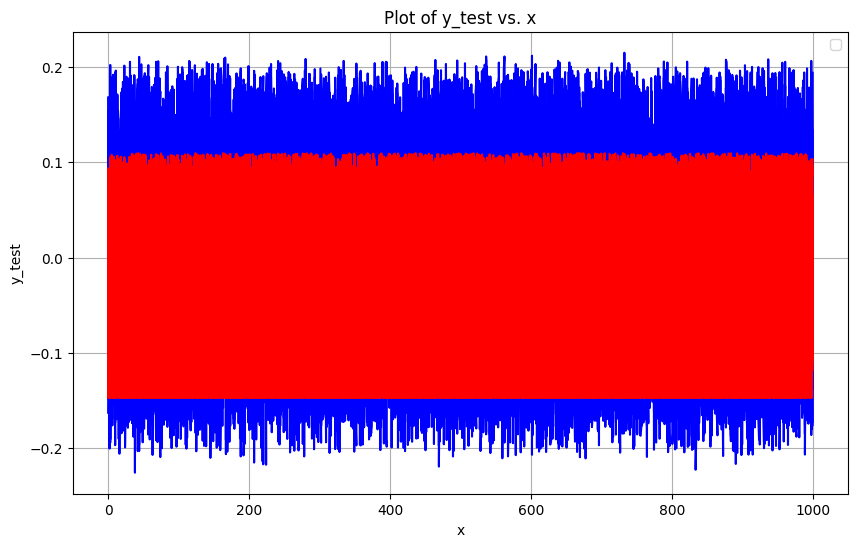

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Z[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Z_MLP[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest

### Predicting on Left

In [ ]:
    # prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
    #     "LLML_ACC_Y": flattened_col2,
    #     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test
    
    
    # Load the data
    data = pd.read_csv("data/Combined_StepL_X.csv")
    
    # Separate features and labels
    features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
    labels = data["StepL_X"]
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
    
    # Create a decision tree regressor model
    model = RandomForestRegressor(n_estimators=50)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    print("MSE for predicting step L on axis X:", score)
    pred_L_X_RF = model.predict(X_test)
    L_X_RF_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_RF))
    L_X_RF_mae = mean_absolute_error(y_test_L_X, pred_L_X_RF)
    print("RMSE for predicting step LEFT on axis X:", L_X_RF_rmse)
    print("MAE for predicting step LEFT on axis X:", L_X_RF_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_RF_rmse,
    'MAE': L_X_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Random_Forest Model for Left on X axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_RF = model.predict(X_test)
L_Y_RF_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_RF))
L_Y_RF_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_RF)
print("RMSE for predicting step LEFT on axis Y:", L_Y_RF_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_RF_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_RF_rmse/10,
    'MAE': L_Y_RF_mae/10
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Left on Y axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_RF = model.predict(X_test)
L_Z_RF_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_RF))
L_Z_RF_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_RF)
print("RMSE for predicting step LEFT on axis Z:", L_Z_RF_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_RF_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_RF_rmse,
    'MAE': L_Z_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Left on Z axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [48]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_RF = model.predict(X_test)
R_X_RF_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_RF))
R_X_RF_mae = mean_absolute_error(y_test_R_X, pred_R_X_RF)
# MedAE (Median Absolute Error)
R_X_RF_medAE = np.median(np.abs(y_test_R_X - pred_R_X_RF))

# R² (R-squared)
R_X_RF_r2 = r2_score(y_test_R_X, pred_R_X_RF)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_RF_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_RF_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_RF_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_RF_r2)

MSE for predicting step R on axis X: 0.9999755114676255
RMSE for predicting step RIGHT on axis X: 0.044477997056426785
MAE for predicting step RIGHT on axis X: 0.03573553637273339


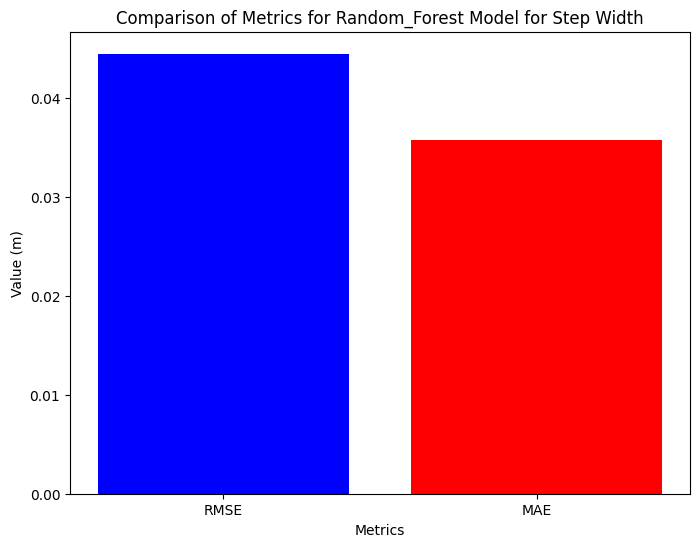

In [49]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_RF_rmse,
    'MAE': R_X_RF_mae,
    'MedAE': R_X_RF_medAE,
    'R²': R_X_RF_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Random_Forest Model for Step Width')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Right_X.png')
plt.show()

/tmp/ipykernel_1197189/1109625737.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


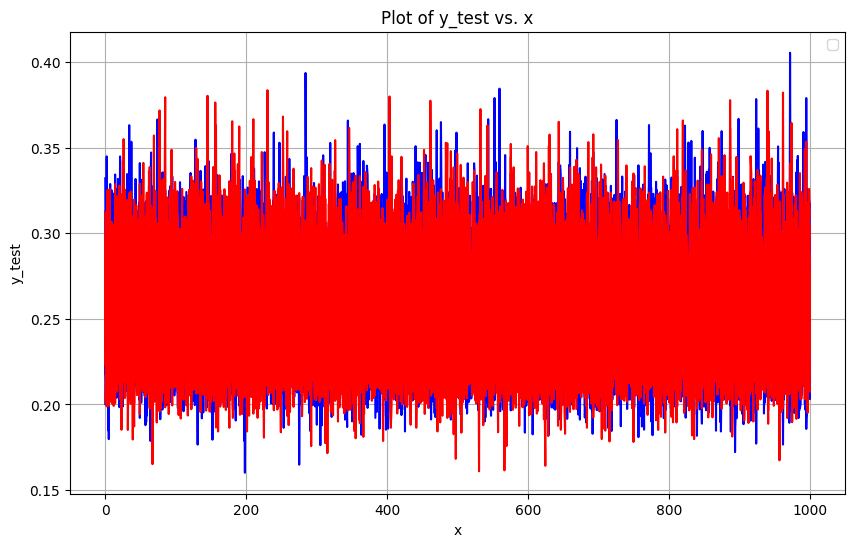

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_X[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_RF[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_RF = model.predict(X_test)
R_Y_RF_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_RF))
R_Y_RF_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_RF)
R_Y_RF_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_RF))

# R² (R-squared)
R_Y_RF_r2 = r2_score(y_test_R_X, pred_R_Y_RF)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_RF_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_RF_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_RF_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_RF_r2)

MSE for predicting step R on axis Y: 0.9999986118388103
RMSE for predicting step RIGHT on axis Y: 0.7616237441163292
MAE for predicting step RIGHT on axis Y: 0.6201440768904867


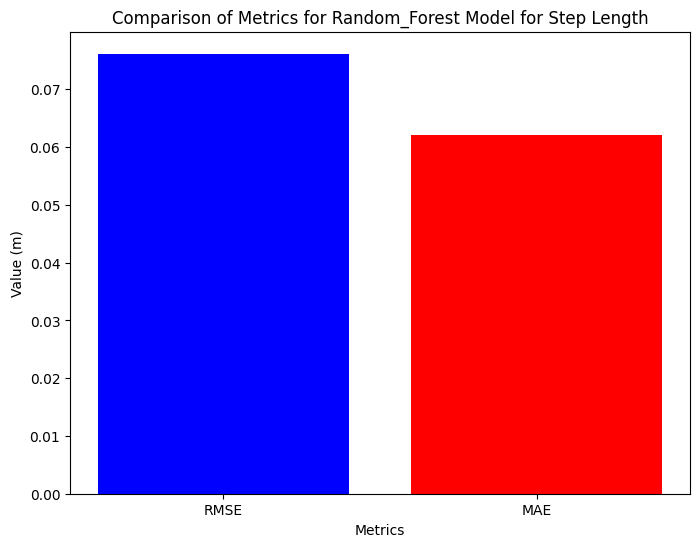

In [52]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_RF_rmse/10,
    'MAE': R_Y_RF_mae/10,
    'MedAE': R_Y_RF_medAE/10,
    'R²': R_Y_RF_r2/10,
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for Random_Forest Model for Step Length')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Right_Y.png')
plt.show()

/tmp/ipykernel_1197189/2642875876.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


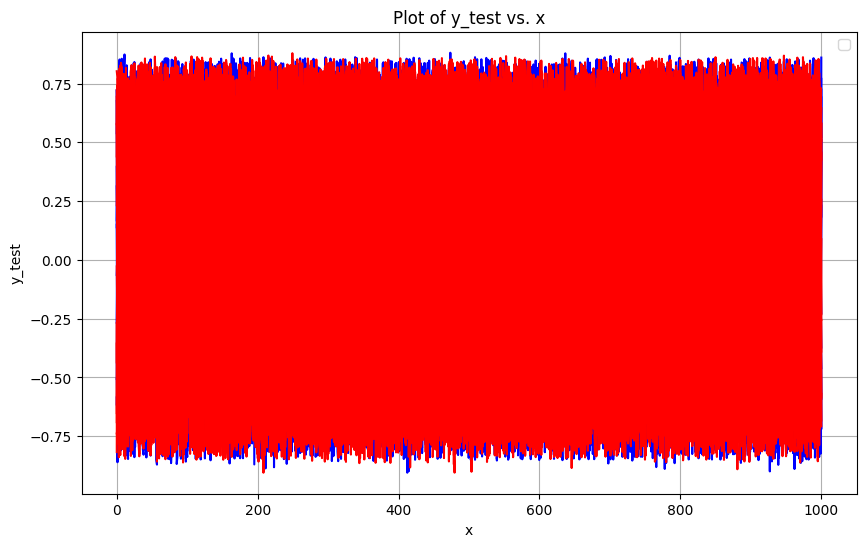

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Y[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_RF[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_RF = model.predict(X_test)
R_Z_RF_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_RF))
R_Z_RF_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_RF)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_RF_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_RF_mae)

MSE for predicting step R on axis Z: 0.9999984981422462
RMSE for predicting step RIGHT on axis Z: 0.14807735708265615
MAE for predicting step RIGHT on axis Z: 0.11985737318407509


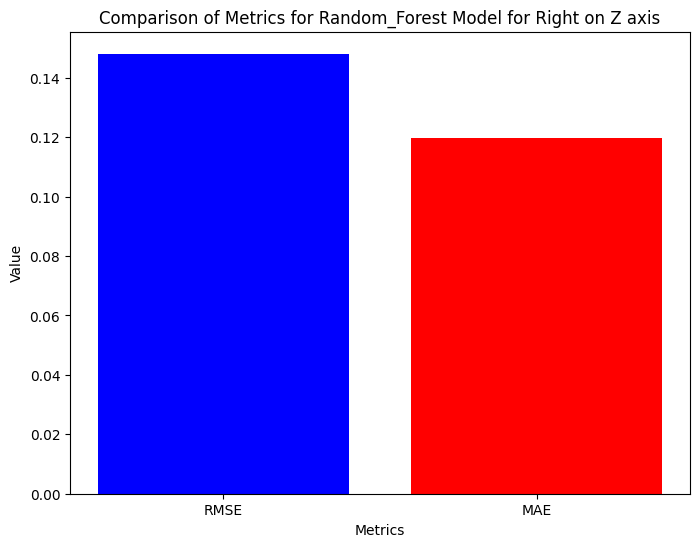

In [55]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_RF_rmse,
    'MAE': R_Z_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Right on Z axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Right_Z.png')
plt.show()

/tmp/ipykernel_1197189/3383379282.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


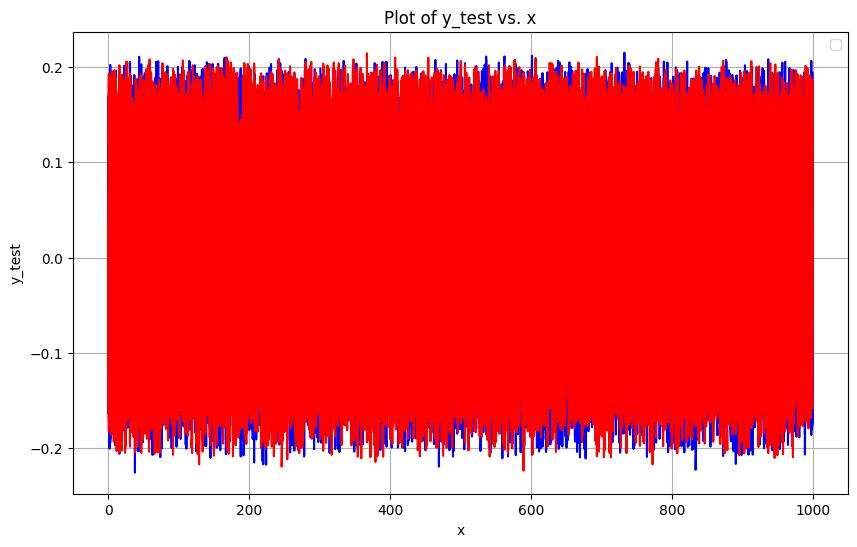

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Z[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Z_RF[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


## CatBoost

### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_CAT = model.predict(X_test)
L_X_CAT_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_CAT))
L_X_CAT_mae = mean_absolute_error(y_test_L_X, pred_L_X_CAT)
print("RMSE for predicting step LEFT on axis X:", L_X_CAT_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)
# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_CAT = model.predict(X_test)
L_Y_CAT_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_CAT))
L_Y_CAT_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_CAT)
print("RMSE for predicting step LEFT on axis Y:", L_Y_CAT_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_CAT = model.predict(X_test)
L_Z_CAT_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_CAT))
L_Z_CAT_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_CAT)
print("RMSE for predicting step LEFT on axis Z:", L_Z_CAT_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_CAT_mae)

### Predicting on Right

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_CAT = model.predict(X_test)
R_X_CAT_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_CAT))
R_X_CAT_mae = mean_absolute_error(y_test_R_X, pred_R_X_CAT)
print("RMSE for predicting step RIGHT on axis X:", R_X_CAT_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_CAT = model.predict(X_test)
R_Y_CAT_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_CAT))
R_Y_CAT_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_CAT)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_CAT_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_CAT = model.predict(X_test)
R_Z_CAT_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_CAT))
R_Z_CAT_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_CAT)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_CAT_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_CAT_mae)

## XGBOOST

### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_XGB = model.predict(X_test)
L_X_XGB_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_XGB))
L_X_XGB_mae = mean_absolute_error(y_test_L_X, pred_L_X_XGB)
print("RMSE for predicting step LEFT on axis X:", L_X_XGB_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_XGB_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_XGB_rmse,
    'MAE': L_X_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Left on X axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_XGB = model.predict(X_test)
L_Y_XGB_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_XGB))
L_Y_XGB_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_XGB)
print("RMSE for predicting step LEFT on axis Y:", L_Y_XGB_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_XGB_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_XGB_rmse/10,
    'MAE': L_Y_XGB_mae/10
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Left on Y axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [ ]:
# Load the data
data = pd.read_csv("data/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_XGB = model.predict(X_test)
L_Z_XGB_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_XGB))
L_Z_XGB_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_XGB)
print("RMSE for predicting step LEFT on axis Z:", L_Z_XGB_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_XGB_mae)

In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_XGB_rmse,
    'MAE': L_Z_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Left on Z axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [57]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_XGB = model.predict(X_test)
R_X_XGB_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_XGB))
R_X_XGB_mae = mean_absolute_error(y_test_R_X, pred_R_X_XGB)
# MedAE (Median Absolute Error)
R_X_XGB_medAE = np.median(np.abs(y_test_R_X - pred_R_X_XGB))

# R² (R-squared)
R_X_XGB_r2 = r2_score(y_test_R_X, pred_R_X_XGB)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_XGB_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_XGB_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_XGB_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_XGB_r2)

MSE for predicting step R on axis X: 0.26000332056915676
RMSE for predicting step RIGHT on axis X: 0.03400312796331791
MAE for predicting step RIGHT on axis X: 0.0278056152301889


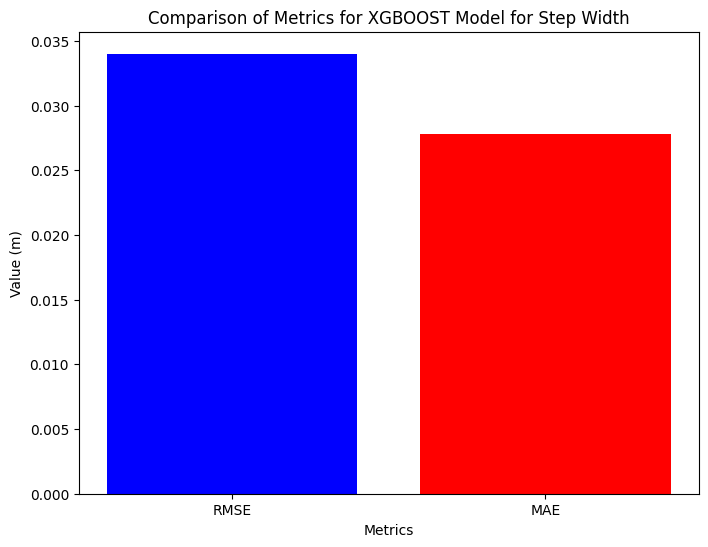

In [58]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_XGB_rmse,
    'MAE': R_X_XGB_mae,
    'MedAE': R_X_XGB_medAE,
    'R²': R_X_XGB_r2,
    
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for XGBOOST Model for Step Width')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Right_X.png')
plt.show()

/tmp/ipykernel_1197189/2362451911.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


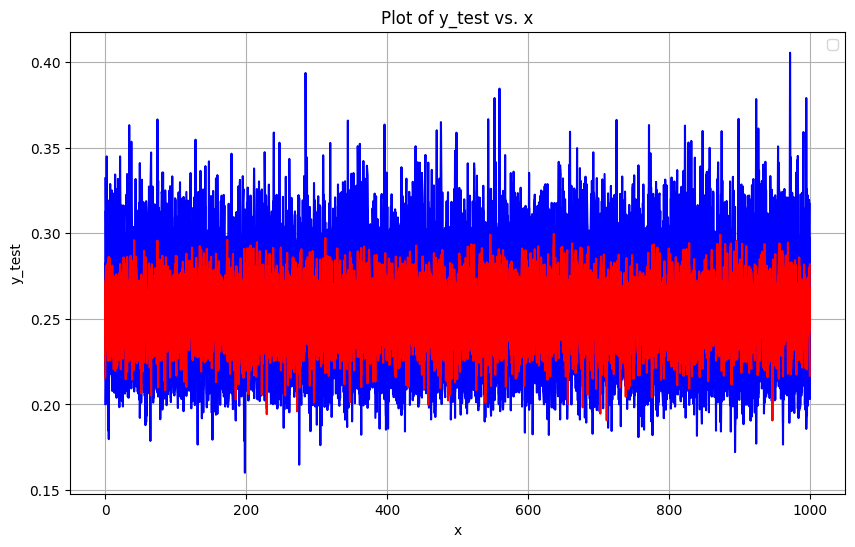

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_X[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_X_XGB[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_XGB = model.predict(X_test)
R_Y_XGB_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_XGB))
R_Y_XGB_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_XGB)
# MedAE (Median Absolute Error)
R_Y_XGB_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_XGB))

# R² (R-squared)
R_Y_XGB_r2 = r2_score(y_test_R_X, pred_R_Y_XGB)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_XGB_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_XGB_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_XGB_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_XGB_r2)

MSE for predicting step R on axis Y: 0.9418669562207515
RMSE for predicting step RIGHT on axis Y: 0.7407654643762119
MAE for predicting step RIGHT on axis Y: 0.6038369318160196


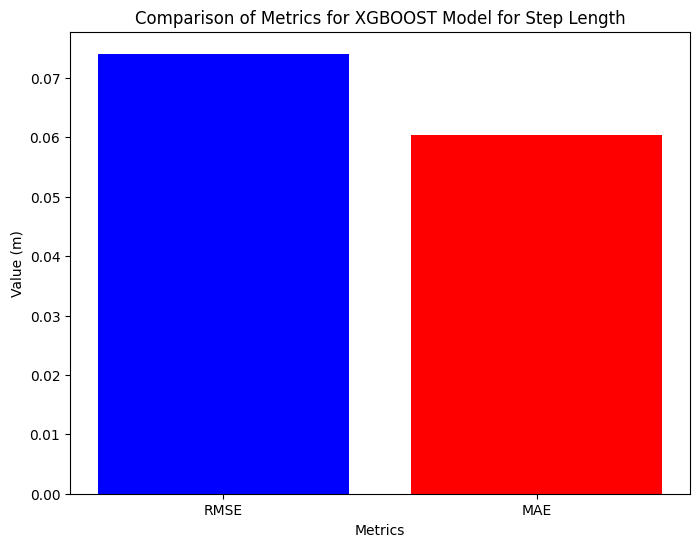

In [61]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_XGB_rmse/10,
    'MAE': R_X_XGB_mae/10,
    'MedAE': R_X_XGB_medAE/10,
    'R²': R_X_XGB_r2/10,
    
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for XGBOOST Model for Step Length')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Right_Y.png')
plt.show()

/tmp/ipykernel_1197189/505637450.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


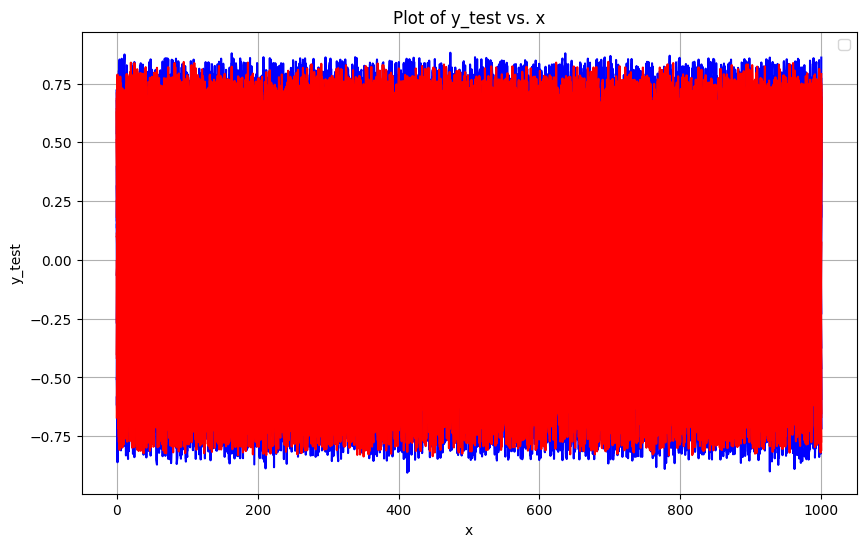

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values from 0 to 1000
x = np.linspace(0, 1000, num=1000)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Define the flattened_step_x_L array for demonstration
# Replace this with your actual flattened_step_x_L data
# flattened_step_x_L = np.random.rand(24001)  # Example data

# Define colors for each plot line
def generate_random_color():
    return np.random.rand(3,)  # Generates an array with 3 random values for RGB

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each segment with a random color
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, y_test_R_Y[i*1000:(i+1)*1000], color="blue")
for i in range(15):  # Adjust range if you have more or fewer segments
    # color = generate_random_color()  # Generate a random color
    plt.plot(x, pred_R_Y_XGB[i*1000:(i+1)*1000], color="red")

plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
# Load the data
data = pd.read_csv("data/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_XGB = model.predict(X_test)
R_Z_XGB_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_XGB))
R_Z_XGB_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_XGB)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_XGB_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_XGB_mae)

MSE for predicting step R on axis Z: 0.9427365393258761
RMSE for predicting step RIGHT on axis Z: 0.1447686872319465
MAE for predicting step RIGHT on axis Z: 0.1175495854151453


## CNN 1D

### Predict on Left

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]].values
labels = data["StepL_X"].values

# Reshape features for CNN input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the 1D CNN model
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        # 1D convolution layer (input channels=1, output channels=32, kernel_size=2)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2)
        # MaxPooling layer
        self.pool = nn.MaxPool1d(kernel_size=2)
        # Fully connected layer
        self.fc1 = nn.Linear(32, 1)
        
    def forward(self, x):
        # Convolution + Max Pooling
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        # Flatten the tensor for the fully connected layer
        x = x.view(x.size(0), -1)  # Flatten the output
        # Fully connected layer
        x = self.fc1(x)
        return x

# Instantiate the model
model = CNNRegressor()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Add a channel dimension (from [batch_size, 1, 3] to [batch_size, 1, 3])
        inputs = inputs.view(-1, 1, 3)  # Ensure shape is [batch_size, channels, features]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 1, 3)  # Ensure shape is [batch_size, channels, features]
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(labels.numpy())

# Flatten the predictions and actuals for evaluation
pred_L_X_CNN = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
L_X_CNN_rmse = np.sqrt(mean_squared_error(actuals, pred_L_X_CNN))
L_X_CNN_mae = mean_absolute_error(actuals, pred_L_X_CNN)

# print(f"RMSE for predicting StepL_X: {rmse:.4f}")
# print(f"MAE for predicting StepL_X: {mae:.4f}")


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_CNN_rmse,
    'MAE': L_X_CNN_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for CNN 1D Model for Left on X axis')

# Show plot
plt.savefig('CNN_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]].values
labels = data["StepL_Y"].values

# Reshape features for CNN input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the 1D CNN model
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        # 1D convolution layer (input channels=1, output channels=32, kernel_size=2)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2)
        # MaxPooling layer
        self.pool = nn.MaxPool1d(kernel_size=2)
        # Fully connected layer
        self.fc1 = nn.Linear(32, 1)
        
    def forward(self, x):
        # Convolution + Max Pooling
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        # Flatten the tensor for the fully connected layer
        x = x.view(x.size(0), -1)  # Flatten the output
        # Fully connected layer
        x = self.fc1(x)
        return x

# Instantiate the model
model = CNNRegressor()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Add a channel dimension (from [batch_size, 1, 3] to [batch_size, 1, 3])
        inputs = inputs.view(-1, 1, 3)  # Ensure shape is [batch_size, channels, features]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 1, 3)  # Ensure shape is [batch_size, channels, features]
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(labels.numpy())

# Flatten the predictions and actuals for evaluation
pred_L_Y_CNN = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
L_Y_CNN_rmse = np.sqrt(mean_squared_error(actuals, pred_L_X_CNN))
L_Y_CNN_mae = mean_absolute_error(actuals, pred_L_X_CNN)

# print(f"RMSE for predicting StepL_Y: {rmse:.4f}")
# print(f"MAE for predicting StepL_Y: {mae:.4f}")


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_CNN_rmse,
    'MAE': L_Y_CNN_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for CNN 1D Model for Left on Y axis')

# Show plot
plt.savefig('CNN_Metrics_Bar_Plot_Left_Y.png')
plt.show()

### Predict on Right

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]].values
labels = data["StepR_X"].values

# Reshape features for CNN input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the 1D CNN model
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        # 1D convolution layer (input channels=1, output channels=32, kernel_size=2)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2)
        # MaxPooling layer
        self.pool = nn.MaxPool1d(kernel_size=2)
        # Fully connected layer
        self.fc1 = nn.Linear(32, 1)
        
    def forward(self, x):
        # Convolution + Max Pooling
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        # Flatten the tensor for the fully connected layer
        x = x.view(x.size(0), -1)  # Flatten the output
        # Fully connected layer
        x = self.fc1(x)
        return x

# Instantiate the model
model = CNNRegressor()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Add a channel dimension (from [batch_size, 1, 3] to [batch_size, 1, 3])
        inputs = inputs.view(-1, 1, 3)  # Ensure shape is [batch_size, channels, features]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 1, 3)  # Ensure shape is [batch_size, channels, features]
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(labels.numpy())

# Flatten the predictions and actuals for evaluation
pred_R_X_CNN = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
R_X_CNN_rmse = np.sqrt(mean_squared_error(actuals, pred_R_X_CNN))
R_X_CNN_mae = mean_absolute_error(actuals, pred_R_X_CNN)

# MedAE (Median Absolute Error)
R_X_CNN_medAE = np.median(np.abs(y_test_R_X - pred_R_X_CNN))

# R² (R-squared)
R_X_CNN_r2 = r2_score(y_test_R_X, pred_R_X_CNN)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_CNN_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_CNN_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_CNN_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_CNN_r2)


Epoch [10/50], Loss: 0.0009
Epoch [20/50], Loss: 0.0009
Epoch [30/50], Loss: 0.0009
Epoch [40/50], Loss: 0.0009
Epoch [50/50], Loss: 0.0009


NameError: name 'rmse' is not defined

In [67]:
print(f"RMSE for predicting StepR_X: {R_X_CNN_rmse:.4f}")
print(f"MAE for predicting StepR_X: {R_X_CNN_mae:.4f}")

RMSE for predicting StepR_X: 0.0293
MAE for predicting StepR_X: 0.0236


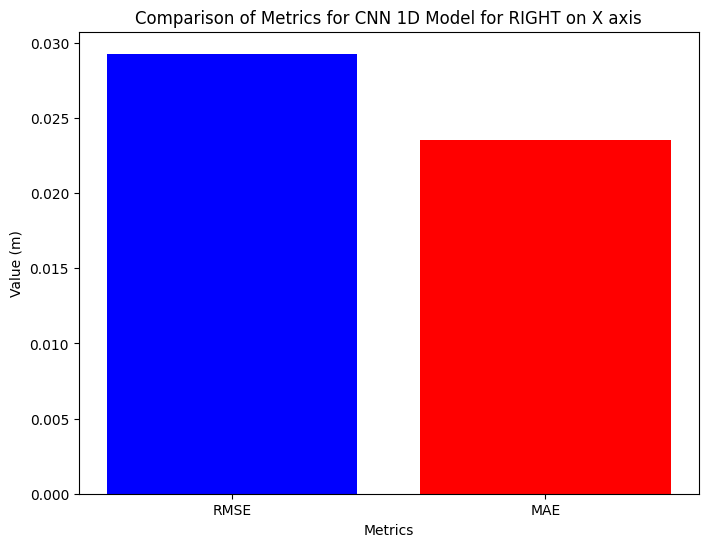

In [68]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_CNN_rmse,
    'MAE': R_X_CNN_mae,
    'MedAE': R_X_CNN_medAE,
    'R²': R_X_CNN_r2,
    
    
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for CNN 1D Model for RIGHT on X axis')

# Show plot
plt.savefig('CNN_Metrics_Bar_Plot_RIGHT_X.png')
plt.show()

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]].values
labels = data["StepR_Y"].values

# Reshape features for CNN input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32).to(device)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1).to(device)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the 1D CNN model
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        # 1D convolution layer (input channels=1, output channels=32, kernel_size=2)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2)
        # MaxPooling layer
        self.pool = nn.MaxPool1d(kernel_size=2)
        # Fully connected layer
        self.fc1 = nn.Linear(32, 1)
        
    def forward(self, x):
        # Convolution + Max Pooling
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        # Flatten the tensor for the fully connected layer
        x = x.view(x.size(0), -1)  # Flatten the output
        # Fully connected layer
        x = self.fc1(x)
        return x

# Instantiate the model and move it to CUDA if available
model = CNNRegressor().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Add a channel dimension (from [batch_size, 1, 3] to [batch_size, 1, 3])
        inputs = inputs.view(-1, 1, 3).to(device)  # Ensure shape is [batch_size, channels, features]
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 1, 3).to(device)  # Ensure shape is [batch_size, channels, features]
        labels = labels.to(device)
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())  # Move outputs to CPU for further processing
        actuals.append(labels.cpu().numpy())  # Move labels to CPU for further processing

# Flatten the predictions and actuals for evaluation
pred_R_Y_CNN = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
R_Y_CNN_rmse = np.sqrt(mean_squared_error(actuals, pred_R_Y_CNN))
R_Y_CNN_mae = mean_absolute_error(actuals, pred_R_Y_CNN)

# MedAE (Median Absolute Error)
R_Y_CNN_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_CNN))

# R² (R-squared)
R_Y_CNN_r2 = r2_score(y_test_R_X, pred_R_Y_CNN)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_CNN_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_CNN_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_CNN_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_CNN_r2)

Using device: cuda
Epoch [10/50], Loss: 0.0241
Epoch [20/50], Loss: 0.0241
Epoch [30/50], Loss: 0.0241
Epoch [40/50], Loss: 0.0241
Epoch [50/50], Loss: 0.0241
RMSE for predicting StepR_Y: 0.1538
MAE for predicting StepR_Y: 0.1067


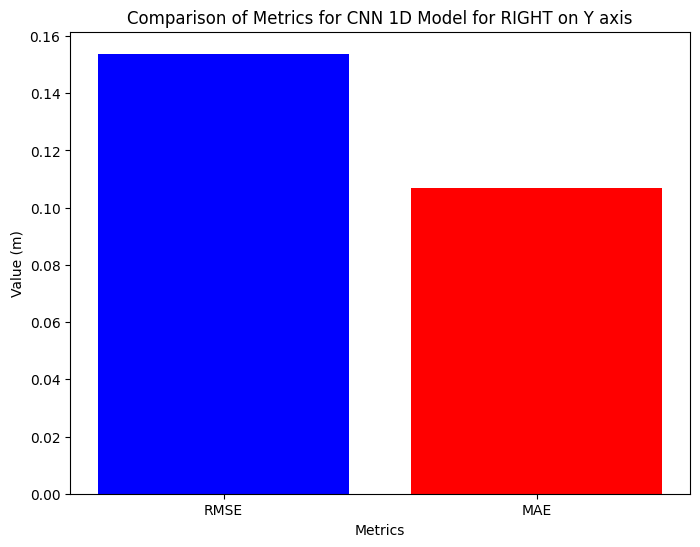

In [70]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_CNN_rmse,
    'MAE': R_Y_CNN_mae,
    'MedAE': R_Y_CNN_medAE,
    'R²': R_Y_CNN_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for CNN 1D Model for RIGHT on Y axis')

# Show plot
plt.savefig('CNN_Metrics_Bar_Plot_RIGHT_Y.png')
plt.show()

## LSTM

### Predict on LEFT

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv("data/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]].values
labels = data["StepL_X"].values

# Reshape features for LSTM input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMRegressor(nn.Module):
    def __init__(self, input_size=3, hidden_layer_size=64, output_size=1, num_layers=1):
        super(LSTMRegressor, self).__init__()
        
        # LSTM layer (input_size, hidden_layer_size, num_layers)
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        # Get LSTM outputs (output, hidden state)
        lstm_out, (hn, cn) = self.lstm(x)
        
        # Use the last hidden state for prediction
        lstm_out = lstm_out[:, -1, :]  # Take the output of the last timestep
        
        # Pass through the fully connected layer
        predictions = self.fc(lstm_out)
        return predictions

# Instantiate the model
model = LSTMRegressor()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(labels.numpy())

# Flatten the predictions and actuals for evaluation
pred_L_X_LSTM = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
L_X_LSTM_rmse = np.sqrt(mean_squared_error(actuals, pred_L_X_LSTM))
L_X_LSTM_mae = mean_absolute_error(actuals, pred_L_X_LSTM)

print(f"RMSE for predicting StepR_X: {rmse:.4f}")
print(f"MAE for predicting StepR_X: {mae:.4f}")


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_LSTM_rmse,
    'MAE': L_X_LSTM_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for LSTM Model for LEFT on X axis')

# Show plot
plt.savefig('LSTM_Metrics_Bar_Plot_LEFT_X.png')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv("data/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]].values
labels = data["StepL_Y"].values

# Reshape features for LSTM input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMRegressor(nn.Module):
    def __init__(self, input_size=3, hidden_layer_size=64, output_size=1, num_layers=1):
        super(LSTMRegressor, self).__init__()
        
        # LSTM layer (input_size, hidden_layer_size, num_layers)
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        # Get LSTM outputs (output, hidden state)
        lstm_out, (hn, cn) = self.lstm(x)
        
        # Use the last hidden state for prediction
        lstm_out = lstm_out[:, -1, :]  # Take the output of the last timestep
        
        # Pass through the fully connected layer
        predictions = self.fc(lstm_out)
        return predictions

# Instantiate the model
model = LSTMRegressor()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(labels.numpy())

# Flatten the predictions and actuals for evaluation
pred_L_Y_LSTM = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
L_Y_LSTM_rmse = np.sqrt(mean_squared_error(actuals, pred_L_Y_LSTM))
L_Y_LSTM_mae = mean_absolute_error(actuals, pred_L_Y_LSTM)

print(f"RMSE for predicting StepR_X: {rmse:.4f}")
print(f"MAE for predicting StepR_X: {mae:.4f}")


In [ ]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_LSTM_rmse,
    'MAE': L_Y_LSTM_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for CNN 1D Model for LEFT on Y axis')

# Show plot
plt.savefig('CNN_Metrics_Bar_Plot_LEFT_Y.png')
plt.show()

### Predict on Right

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the data
data = pd.read_csv("data/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]].values
labels = data["StepR_X"].values

# Reshape features for LSTM input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors and move to CUDA if available
features_tensor = torch.tensor(features, dtype=torch.float32).to(device)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1).to(device)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMRegressor(nn.Module):
    def __init__(self, input_size=3, hidden_layer_size=64, output_size=1, num_layers=1):
        super(LSTMRegressor, self).__init__()
        
        # LSTM layer (input_size, hidden_layer_size, num_layers)
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        # Get LSTM outputs (output, hidden state)
        lstm_out, (hn, cn) = self.lstm(x)
        
        # Use the last hidden state for prediction
        lstm_out = lstm_out[:, -1, :]  # Take the output of the last timestep
        
        # Pass through the fully connected layer
        predictions = self.fc(lstm_out)
        return predictions

# Instantiate the model and move it to CUDA if available
model = LSTMRegressor().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Move inputs and labels to the device (GPU if available)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move inputs and labels to the device (GPU if available)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Get predictions
        outputs = model(inputs)
        
        # Move predictions and actuals to CPU for further processing
        predictions.append(outputs.cpu().numpy())
        actuals.append(labels.cpu().numpy())

# Flatten the predictions and actuals for evaluation
pred_R_X_LSTM = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
R_X_LSTM_rmse = np.sqrt(mean_squared_error(actuals, pred_R_X_LSTM))
R_X_LSTM_mae = mean_absolute_error(actuals, pred_R_X_LSTM)

# MedAE (Median Absolute Error)
R_X_LSTM_medAE = np.median(np.abs(y_test_R_X - pred_R_X_LSTM))

# R² (R-squared)
R_X_LSTM_r2 = r2_score(y_test_R_X, pred_R_X_LSTM)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_X_LSTM_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_LSTM_mae)
print("MedAE for predicting step RIGHT on axis X:", R_X_LSTM_medAE)
print("R² for predicting step RIGHT on axis X:", R_X_LSTM_r2)


Using device: cuda
Epoch [10/50], Loss: 0.0007
Epoch [20/50], Loss: 0.0007
Epoch [30/50], Loss: 0.0007
Epoch [40/50], Loss: 0.0007
Epoch [50/50], Loss: 0.0007
RMSE for predicting StepR_X: 0.0264
MAE for predicting StepR_X: 0.0206


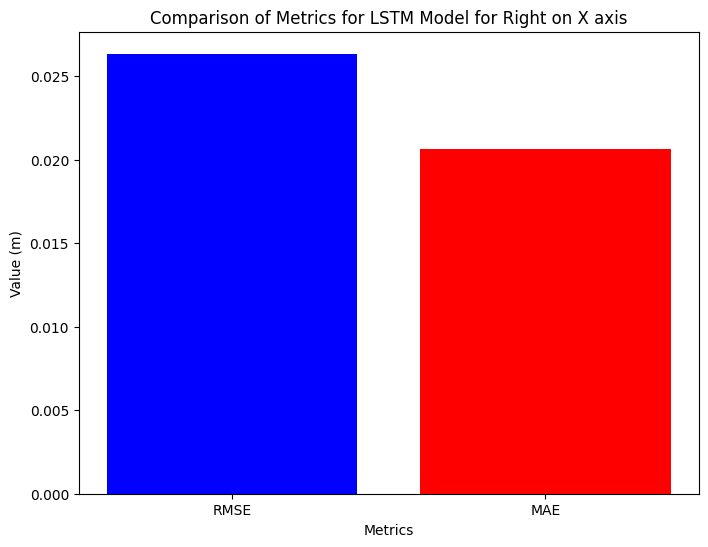

In [77]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_LSTM_rmse,
    'MAE': R_X_LSTM_mae,
    'MedAE': R_X_LSTM_medAE,
    'R²': R_X_LSTM_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for LSTM Model for Right on X axis')

# Show plot
plt.savefig('LSTM_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the data
data = pd.read_csv("data/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]].values
labels = data["StepR_Y"].values

# Reshape features for LSTM input (samples, timesteps, features)
features = features.reshape((features.shape[0], 1, features.shape[1]))  # (samples, 1, 3)

# Convert to PyTorch tensors and move to CUDA if available
features_tensor = torch.tensor(features, dtype=torch.float32).to(device)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1).to(device)  # Make labels column vector

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.25, random_state=42)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMRegressor(nn.Module):
    def __init__(self, input_size=3, hidden_layer_size=64, output_size=1, num_layers=1):
        super(LSTMRegressor, self).__init__()
        
        # LSTM layer (input_size, hidden_layer_size, num_layers)
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        # Get LSTM outputs (output, hidden state)
        lstm_out, (hn, cn) = self.lstm(x)
        
        # Use the last hidden state for prediction
        lstm_out = lstm_out[:, -1, :]  # Take the output of the last timestep
        
        # Pass through the fully connected layer
        predictions = self.fc(lstm_out)
        return predictions

# Instantiate the model and move it to CUDA if available
model = LSTMRegressor().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Move inputs and labels to the device (GPU if available)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move inputs and labels to the device (GPU if available)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Get predictions
        outputs = model(inputs)
        
        # Move predictions and actuals to CPU for further processing
        predictions.append(outputs.cpu().numpy())
        actuals.append(labels.cpu().numpy())

# Flatten the predictions and actuals for evaluation
pred_R_Y_LSTM = np.concatenate(predictions, axis=0).flatten()
actuals = np.concatenate(actuals, axis=0).flatten()

# Compute RMSE and MAE
R_Y_LSTM_rmse = np.sqrt(mean_squared_error(actuals, pred_R_Y_LSTM))
R_Y_LSTM_mae = mean_absolute_error(actuals, pred_R_Y_LSTM)

# MedAE (Median Absolute Error)
R_Y_LSTM_medAE = np.median(np.abs(y_test_R_X - pred_R_Y_LSTM))

# R² (R-squared)
R_Y_LSTM_r2 = r2_score(y_test_R_X, pred_R_Y_LSTM)

# Print all metrics
print("RMSE for predicting step RIGHT on axis X:", R_Y_LSTM_rmse)
print("MAE for predicting step RIGHT on axis X:", R_Y_LSTM_mae)
print("MedAE for predicting step RIGHT on axis X:", R_Y_LSTM_medAE)
print("R² for predicting step RIGHT on axis X:", R_Y_LSTM_r2)


Using device: cuda
Epoch [10/50], Loss: 0.0139
Epoch [20/50], Loss: 0.0138
Epoch [30/50], Loss: 0.0138
Epoch [40/50], Loss: 0.0137
Epoch [50/50], Loss: 0.0137
RMSE for predicting StepR_Y: 0.1171
MAE for predicting StepR_Y: 0.0702


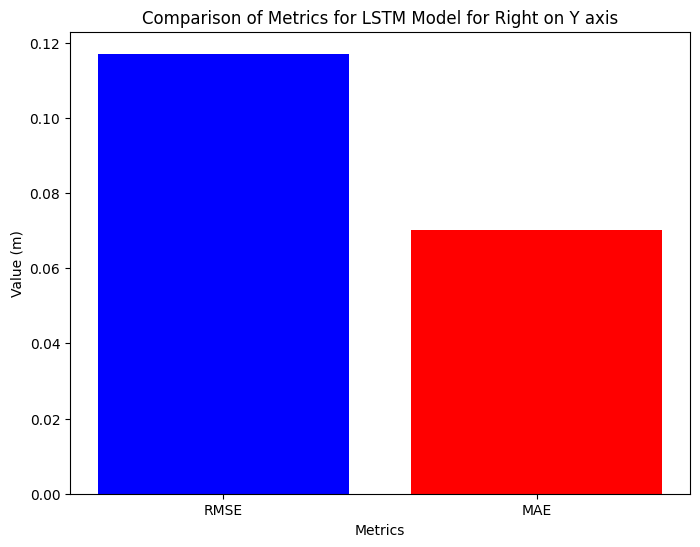

In [76]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_LSTM_rmse,
    'MAE': R_Y_LSTM_mae,
    'MedAE': R_Y_LSTM_medAE,
    'R²': R_Y_LSTM_r2,
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green', 'yellow'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value (m)')
plt.title('Comparison of Metrics for LSTM Model for Right on Y axis')

# Show plot
plt.savefig('LSTM_Metrics_Bar_Plot_Right_Y.png')
plt.show()

# Plots

/tmp/ipykernel_1197189/181723137.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([rmse_key, mae_key], rotation=45)
/tmp/ipykernel_1197189/181723137.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([rmse_key, mae_key], rotation=45)
/tmp/ipykernel_1197189/181723137.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([rmse_key, mae_key], rotation=45)
/tmp/ipykernel_1197189/181723137.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([rmse_key, mae_key], rotation=45)
/tmp/ipykernel_1197189/181723137.py:58: UserWarning: set_ticklabels() should only be use

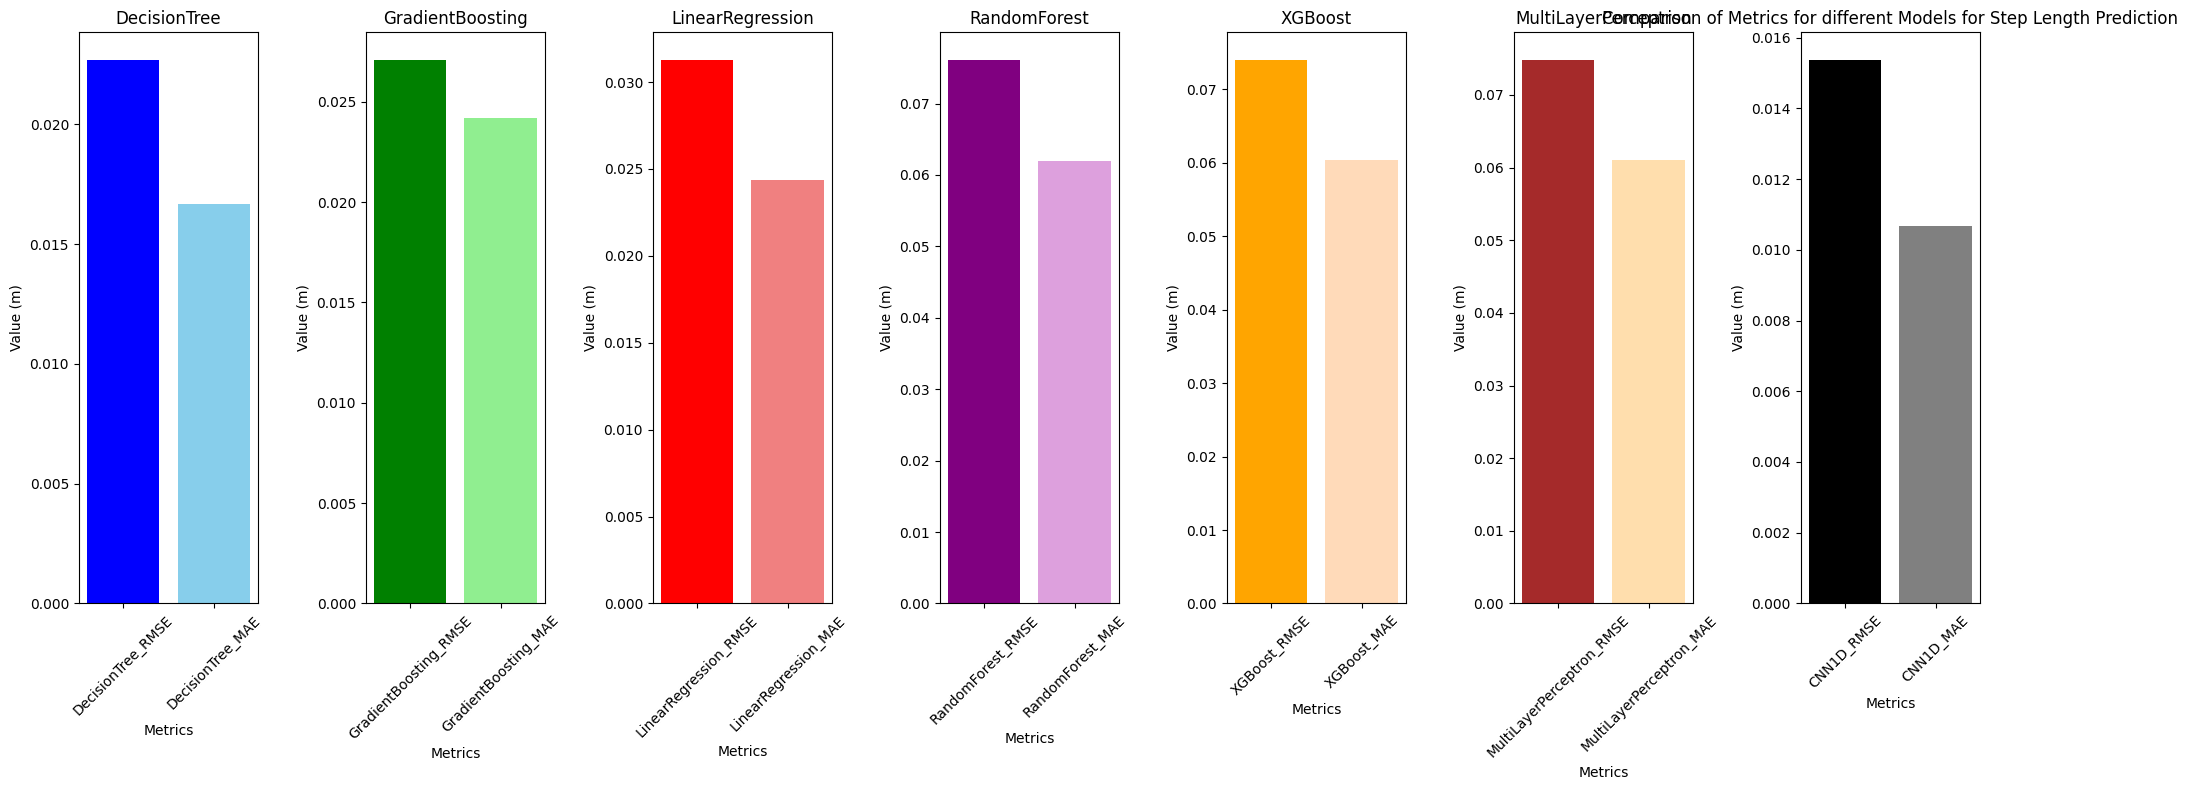

In [78]:
import matplotlib.pyplot as plt

# Define the metrics and corresponding model names
metrics = {
    'DecisionTree_RMSE': R_Y_DT_rmse / 10,
    'DecisionTree_MAE': R_Y_DT_mae / 10,
    'GradientBoosting_RMSE': R_Y_GB_rmse / 10,
    'GradientBoosting_MAE': R_Y_GB_mae / 10,
    'LinearRegression_RMSE': R_Y_LR_rmse / 10,
    'LinearRegression_MAE': R_Y_LR_mae / 10,
    'RandomForest_RMSE': R_Y_RF_rmse / 10,
    'RandomForest_MAE': R_Y_RF_mae / 10,
    'XGBoost_RMSE': R_Y_XGB_rmse / 10,
    'XGBoost_MAE': R_Y_XGB_mae / 10,
    'MultiLayerPerceptron_RMSE': R_Y_MLP_rmse / 10,
    'MultiLayerPerceptron_MAE': R_Y_MLP_mae / 10,
    'CNN1D_RMSE': R_Y_CNN_rmse / 10,
    'CNN1D_MAE': R_Y_CNN_mae / 10
}

# Group metrics by model names
model_names = ['DecisionTree', 'GradientBoosting', 'LinearRegression', 
               'RandomForest', 'XGBoost', 'MultiLayerPerceptron', 'CNN1D']

# Custom colors: darker for RMSE, lighter for MAE
colors = [
    'blue', 'skyblue',           # Decision Tree
    'green', 'lightgreen',       # Gradient Boosting
    'red', 'lightcoral',         # Linear Regression
    'purple', 'plum',            # Random Forest
    'orange', 'peachpuff',       # XGBoost
    'brown', 'navajowhite',       # MultiLayer Perceptron
    'black', 'gray'       # CNN 1D
]

# Number of models
n_models = len(model_names)

# Create subplots
fig, axes = plt.subplots(1, n_models, figsize=(20, 8))

# Iterate over models and plot RMSE and MAE for each
for i, model in enumerate(model_names):
    rmse_key = f'{model}_RMSE'
    mae_key = f'{model}_MAE'
    
    # Plot RMSE and MAE for the current model
    axes[i].bar([rmse_key, mae_key], 
                [metrics[rmse_key], metrics[mae_key]], 
                color=[colors[2*i], colors[2*i+1]])
    
    # Set the title for each subplot
    axes[i].set_title(model)
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Value (m)')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels([rmse_key, mae_key], rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and show the plot
plt.title('Comparison of Metrics for different Models for Step Length Prediction')
plt.savefig('Model_Metrics_Subplots.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and corresponding model names
metrics = {
    'DecisionTree_MedAE': R_Y_DT_medAE / 10,
    'DecisionTree_R2': R_Y_DT_r2 / 10,
    'GradientBoosting_MedAE': R_Y_GB_medAE / 10,
    'GradientBoosting_R2': R_Y_GB_r2 / 10,
    'LinearRegression_MedAE': R_Y_LR_medAE / 10,
    'LinearRegression_R2': R_Y_LR_r2 / 10,
    'RandomForest_MedAE': R_Y_RF_medAE / 10,
    'RandomForest_R2': R_Y_RF_r2 / 10,
    'XGBoost_MedAE': R_Y_XGB_medAE / 10,
    'XGBoost_R2': R_Y_XGB_r2 / 10,
    'MultiLayerPerceptron_MedAE': R_Y_MLP_medAE / 10,
    'MultiLayerPerceptron_R2': R_Y_MLP_r2 / 10,
    'CNN1D_MedAE': R_Y_CNN_medAE / 10,
    'CNN1D_R2': R_Y_CNN_r2 / 10
}

# Group metrics by model names
model_names = ['DecisionTree', 'GradientBoosting', 'LinearRegression', 
               'RandomForest', 'XGBoost', 'MultiLayerPerceptron', 'CNN1D']

# Custom colors: darker for MedAE, lighter for R2
colors = [
    'blue', 'skyblue',           # Decision Tree
    'green', 'lightgreen',       # Gradient Boosting
    'red', 'lightcoral',         # Linear Regression
    'purple', 'plum',            # Random Forest
    'orange', 'peachpuff',       # XGBoost
    'brown', 'navajowhite',       # MultiLayer Perceptron
    'black', 'gray'       # CNN 1D
]

# Number of models
n_models = len(model_names)

# Create subplots
fig, axes = plt.subplots(1, n_models, figsize=(20, 8))

# Iterate over models and plot MedAE and R2 for each
for i, model in enumerate(model_names):
    medAE_key = f'{model}_MedAE'
    r2_key = f'{model}_R2'
    
    # Plot MedAE and R2 for the current model
    axes[i].bar([medAE_key, r2_key], 
                [metrics[medAE_key], metrics[r2_key]], 
                color=[colors[2*i], colors[2*i+1]])
    
    # Set the title for each subplot
    axes[i].set_title(model)
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Value (m)')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels([medAE_key, r2_key], rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and show the plot
plt.title('Comparison of Metrics for different Models for Step Length Prediction')
plt.savefig('Model_Metrics_Subplots.png')
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Define the metrics and corresponding model names
metrics = {
    'DecisionTree_RMSE': R_Y_DT_rmse / 10,
    'DecisionTree_MAE': R_Y_DT_mae / 10,
    'GradientBoosting_RMSE': R_Y_GB_rmse / 10,
    'GradientBoosting_MAE': R_Y_GB_mae / 10,
    'LinearRegression_RMSE': R_Y_LR_rmse / 10,
    'LinearRegression_MAE': R_Y_LR_mae / 10,
    'RandomForest_RMSE': R_Y_RF_rmse / 10,
    'RandomForest_MAE': R_Y_RF_mae / 10,
    'XGBoost_RMSE': R_Y_XGB_rmse / 10,
    'XGBoost_MAE': R_Y_XGB_mae / 10,
    'MultiLayerPerceptron_RMSE': R_Y_MLP_rmse / 10,
    'MultiLayerPerceptron_MAE': R_Y_MLP_mae / 10,
    'CNN1D_RMSE': R_Y_CNN_rmse / 10,
    'CNN1D_MAE': R_Y_CNN_mae / 10
}


# Group metrics by model names
# model_names = ['Decision Tree', 'Gradient Boosting', 'Linear Regression', 
#                'Random Forest', 'XGBoost', 'MultiLayer Perceptron']
model_names = ['Linear Regression', 'MultiLayer Perceptron', 'Decision Tree', 
               'Random Forest', 'Gradient Boosting', 'XGBoost', 'CNN1D']
# Custom colors: darker for RMSE, lighter for MAE
colors = [
    'blue', 'skyblue',           # Decision Tree
    'green', 'lightgreen',       # Gradient Boosting
    'red', 'lightcoral',         # Linear Regression
    'purple', 'plum',            # Random Forest
    'orange', 'peachpuff',       # XGBoost
    'brown', 'navajowhite',       # MultiLayer Perceptron
    'black', 'gray'       # CNN 1D
    
]

# Number of models
n_models = len(model_names)

# Create subplots
fig, axes = plt.subplots(1, n_models, figsize=(20, 8))

# Iterate over models and plot RMSE and MAE for each
for i, model in enumerate(model_names):
    rmse_key = f'{model_names[i].replace(" ", "")}_RMSE'
    mae_key = f'{model_names[i].replace(" ", "")}_MAE'
    
    # Plot RMSE and MAE for the current model
    axes[i].bar(['RMSE', 'MAE'], 
                [metrics[rmse_key], metrics[mae_key]], 
                color=[colors[2*i], colors[2*i+1]])
    
    # Set the title for each subplot
    axes[i].set_title(model)
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Step Length (m)')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(['RMSE', 'MAE'], rotation=0)

# Add an overall title for the figure
fig.suptitle('Comparison of Metrics for Different Models for Step Length Prediction', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save and show the plot
plt.savefig('Model_Metrics_Subplots.png')
plt.show()


NameError: name 'R_Y_DT_RMSE' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and corresponding model names
metrics = {
    'DecisionTree_MedAE': R_X_DT_medAE / 10,
    'DecisionTree_R2': R_X_DT_r2 / 10,
    'GradientBoosting_MedAE': R_X_GB_medAE / 10,
    'GradientBoosting_R2': R_X_GB_r2 / 10,
    'LinearRegression_MedAE': R_X_LR_medAE / 10,
    'LinearRegression_R2': R_X_LR_r2 / 10,
    'RandomForest_MedAE': R_X_RF_medAE / 10,
    'RandomForest_R2': R_X_RF_r2 / 10,
    'XGBoost_MedAE': R_X_XGB_medAE / 10,
    'XGBoost_R2': R_X_XGB_r2 / 10,
    'MultiLayerPerceptron_MedAE': R_X_MLP_medAE / 10,
    'MultiLayerPerceptron_R2': R_X_MLP_r2 / 10,
    'CNN1D_MedAE': R_X_CNN_medAE / 10,
    'CNN1D_R2': R_X_CNN_r2 / 10
}


# Group metrics by model names
# model_names = ['Decision Tree', 'Gradient Boosting', 'Linear Regression', 
#                'Random Forest', 'XGBoost', 'MultiLayer Perceptron']
model_names = ['Linear Regression', 'MultiLayer Perceptron', 'Decision Tree', 
               'Random Forest', 'Gradient Boosting', 'XGBoost', 'CNN1D']
# Custom colors: darker for MedAE, lighter for R2
colors = [
    'blue', 'skyblue',           # Decision Tree
    'green', 'lightgreen',       # Gradient Boosting
    'red', 'lightcoral',         # Linear Regression
    'purple', 'plum',            # Random Forest
    'orange', 'peachpuff',       # XGBoost
    'brown', 'navajowhite',       # MultiLayer Perceptron
    'black', 'gray'       # CNN 1D
    
]

# Number of models
n_models = len(model_names)

# Create subplots
fig, axes = plt.subplots(1, n_models, figsize=(20, 8))

# Iterate over models and plot MedAE and R2 for each
for i, model in enumerate(model_names):
    medAE_key = f'{model_names[i].replace(" ", "")}_MedAE'
    r2_key = f'{model_names[i].replace(" ", "")}_R2'
    
    # Plot MedAE and R2 for the current model
    axes[i].bar(['MedAE', 'R2'], 
                [metrics[medAE_key], metrics[r2_key]], 
                color=[colors[2*i], colors[2*i+1]])
    
    # Set the title for each subplot
    axes[i].set_title(model)
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Step Length (m)')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(['MedAE', 'R2'], rotation=0)

# Add an overall title for the figure
fig.suptitle('Comparison of Metrics for Different Models for Step Length Prediction', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save and show the plot
plt.savefig('Model_Metrics_Subplots.png')
plt.show()


/tmp/ipykernel_1197189/2091239068.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['RMSE', 'MAE'], rotation=0)
/tmp/ipykernel_1197189/2091239068.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['RMSE', 'MAE'], rotation=0)
/tmp/ipykernel_1197189/2091239068.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['RMSE', 'MAE'], rotation=0)
/tmp/ipykernel_1197189/2091239068.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['RMSE', 'MAE'], rotation=0)
/tmp/ipykernel_1197189/2091239068.py:60: UserWarning: set_ticklabels() should only be used with a fixed 

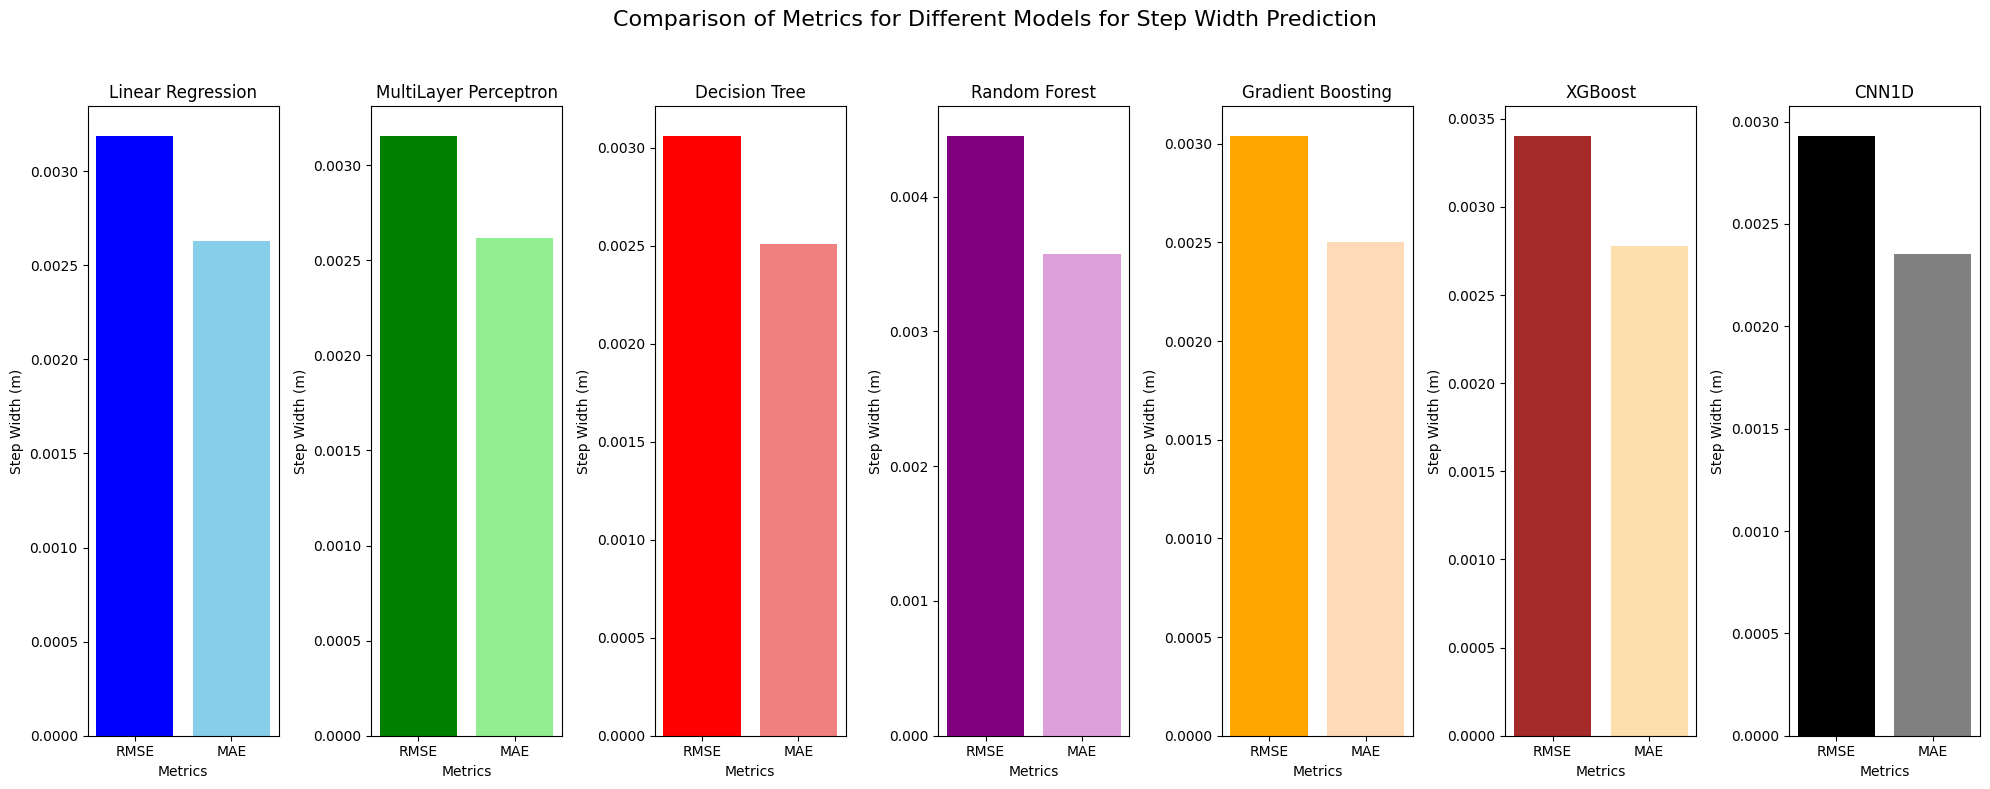

In [80]:
import matplotlib.pyplot as plt

# Define the metrics and corresponding model names
metrics = {
    'DecisionTree_RMSE': R_X_DT_rmse / 10,
    'DecisionTree_MAE': R_X_DT_mae / 10,
    'GradientBoosting_RMSE': R_X_GB_rmse / 10,
    'GradientBoosting_MAE': R_X_GB_mae / 10,
    'LinearRegression_RMSE': R_X_LR_rmse / 10,
    'LinearRegression_MAE': R_X_LR_mae / 10,
    'RandomForest_RMSE': R_X_RF_rmse / 10,
    'RandomForest_MAE': R_X_RF_mae / 10,
    'XGBoost_RMSE': R_X_XGB_rmse / 10,
    'XGBoost_MAE': R_X_XGB_mae / 10,
    'MultiLayerPerceptron_RMSE': R_X_MLP_rmse / 10,
    'MultiLayerPerceptron_MAE': R_X_MLP_mae / 10,
        'CNN1D_RMSE': R_X_CNN_rmse / 10,
    'CNN1D_MAE': R_X_CNN_mae / 10

}


# Group metrics by model names
model_names = ['Linear Regression', 'MultiLayer Perceptron', 'Decision Tree', 
               'Random Forest', 'Gradient Boosting', 'XGBoost', 'CNN1D']

# Custom colors: darker for RMSE, lighter for MAE
colors = [
    'blue', 'skyblue',           # Decision Tree
    'green', 'lightgreen',       # Gradient Boosting
    'red', 'lightcoral',         # Linear Regression
    'purple', 'plum',            # Random Forest
    'orange', 'peachpuff',       # XGBoost
    'brown', 'navajowhite',       # MultiLayer Perceptron
    'black', 'gray'       # MultiLayer Perceptron
]

# Number of models
n_models = len(model_names)

# Create subplots
fig, axes = plt.subplots(1, n_models, figsize=(20, 8))

# Iterate over models and plot RMSE and MAE for each
for i, model in enumerate(model_names):
    rmse_key = f'{model_names[i].replace(" ", "")}_RMSE'
    mae_key = f'{model_names[i].replace(" ", "")}_MAE'
    
    # Plot RMSE and MAE for the current model
    axes[i].bar(['RMSE', 'MAE'], 
                [metrics[rmse_key], metrics[mae_key]], 
                color=[colors[2*i], colors[2*i+1]])
    
    # Set the title for each subplot
    axes[i].set_title(model)
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Step Width (m)')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(['RMSE', 'MAE'], rotation=0)

# Add an overall title for the figure
fig.suptitle('Comparison of Metrics for Different Models for Step Width Prediction', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save and show the plot
plt.savefig('Model_Metrics_Width_Subplots.png')
plt.show()


## KDE PLOT

In [81]:
# prompt: write kdeplot (actual ws pred distribution), to plot, y_test, with prediction of mulitple model, pred_nn, pred, forest, pred_cat, pred_xgb and save it to a file
# LEFT X

import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Left X': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Elastic Net': '#e7c505',
    'LASSO': '#7F7F7F',  # Changed to distinguish from Elastic Net
    'Linear Regression': '#FF6F61',  # Changed to distinguish from Elastic Net
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#17becf',  # Teal
    'CNN1D': 'yellow'  # Teal
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_L_X, label='Step Left X', shade=False, color=colors['Step Left X'])
sns.kdeplot(pred_L_X_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_L_X_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
# sns.kdeplot(pred_L_X_ENR, label='Elastic Net', shade=False, color=colors['Elastic Net'])
# sns.kdeplot(pred_L_X_LASSO, label='LASSO', shade=False, color=colors['LASSO'])
sns.kdeplot(pred_L_X_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_L_X_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_L_X_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_L_X_GB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Replacing with 'XGBoost' for clarity
sns.kdeplot(pred_L_X_CNN, label='CNN1D', shade=False, color=colors['CNN1D'])  # Replacing with 'XGBoost' for clarity

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('LEFT_X_kdeplot.png')
plt.show()



NameError: name 'y_test_L_X' is not defined

In [82]:
# LEFT Y

import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Left Y': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#17becf',  # Teal
    'CNN1D': 'yellow'  # Teal
    
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_L_Y, label='Step Left Y', shade=False, color=colors['Step Left Y'])
sns.kdeplot(pred_L_Y_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_L_Y_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_L_Y_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_L_Y_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_L_Y_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_L_Y_GB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Replacing with 'XGBoost' for clarity
sns.kdeplot(pred_L_Y_CNN, label='CNN1D', shade=False, color=colors['CNN1D'])  # Replacing with 'XGBoost' for clarity

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('LEFT_Y_kdeplot.png')
plt.show()


NameError: name 'y_test_L_Y' is not defined

In [83]:
# LEFT Z

import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Left Z': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf',  # Greenish color for XGBoost
    'CNN1D': 'yellow'  # Teal
    
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_L_Z, label='Step Left Z', shade=False, color=colors['Step Left Z'])
sns.kdeplot(pred_L_Z_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_L_Z_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_L_Z_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_L_Z_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_L_Z_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_L_Z_ZGB, label='XGBoost', shade=False, color=colors['XGBoost'])
# sns.kdeplot(pred_L_Z_ZGB, label='CNN1D', shade=False, color=colors['CNN1D'])

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('LEFT_Z_kdeplot.png')
plt.show()


NameError: name 'y_test_L_Z' is not defined

/tmp/ipykernel_1197189/1967219112.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_R_X, label='Step Right X', shade=False, color=colors['Step Right X'])
/tmp/ipykernel_1197189/1967219112.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_R_X_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
/tmp/ipykernel_1197189/1967219112.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_R_X_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
/tmp/ipykernel_1197189/1967219112.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=F

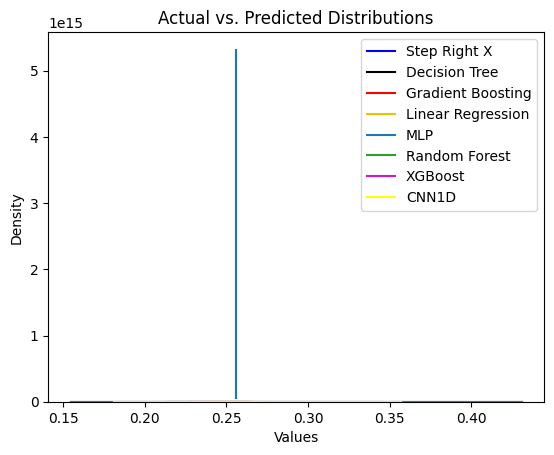

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Right X': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf',  # Greenish color for XGBoost
    'CNN1D': 'yellow'  # Teal
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_R_X, label='Step Right X', shade=False, color=colors['Step Right X'])
sns.kdeplot(pred_R_X_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_R_X_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_R_X_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_R_X_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_R_X_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_R_X_XGB, label='XGBoost', shade=False, color=colors['XGBoost'])
sns.kdeplot(pred_R_X_CNN, label='CNN1D', shade=False, color=colors['CNN1D'])

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('right_X_kdeplot.png')
plt.show()


/tmp/ipykernel_1197189/2236997907.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_R_Y, label='Step Right Y', shade=False, color=colors['Step Right Y'])
/tmp/ipykernel_1197189/2236997907.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_R_Y_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
/tmp/ipykernel_1197189/2236997907.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_R_Y_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
/tmp/ipykernel_1197189/2236997907.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=F

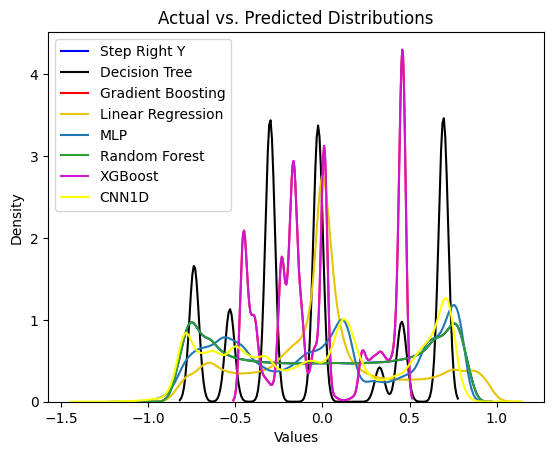

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Right Y': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf',  # Greenish color for XGBoost
    'CNN1D': 'yellow'  # Teal
    
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_R_Y, label='Step Right Y', shade=False, color=colors['Step Right Y'])
sns.kdeplot(pred_R_Y_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_R_Y_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_R_Y_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_R_Y_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_R_Y_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_R_Y_GB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Make sure the label is correct
sns.kdeplot(pred_R_Y_CNN, label='CNN1D', shade=False, color=colors['CNN1D'])  # Make sure the label is correct

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('right_Y_kdeplot.png')
plt.show()


/tmp/ipykernel_1197189/891511636.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_R_Z, label='Step Right Z', shade=False, color=colors['Step Right Z'])
/tmp/ipykernel_1197189/891511636.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_R_Z_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
/tmp/ipykernel_1197189/891511636.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_R_Z_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
/tmp/ipykernel_1197189/891511636.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False

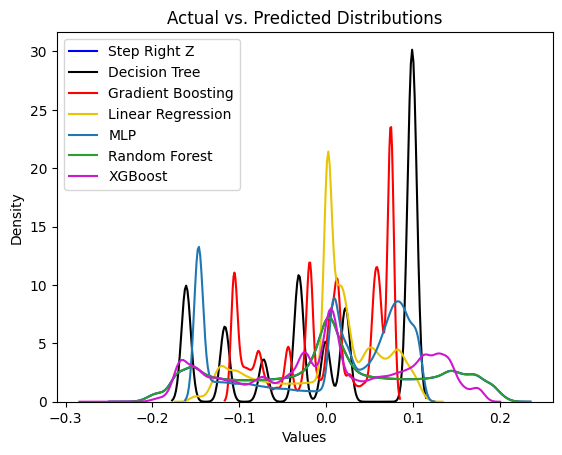

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Right Z': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_R_Z, label='Step Right Z', shade=False, color=colors['Step Right Z'])
sns.kdeplot(pred_R_Z_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_R_Z_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_R_Z_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_R_Z_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_R_Z_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_R_Z_XGB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Make sure the label is correct

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('RIGHT_Z_kdeplot.png')
plt.show()


## Scatter Plot

NameError: name 'y_test_L_X' is not defined

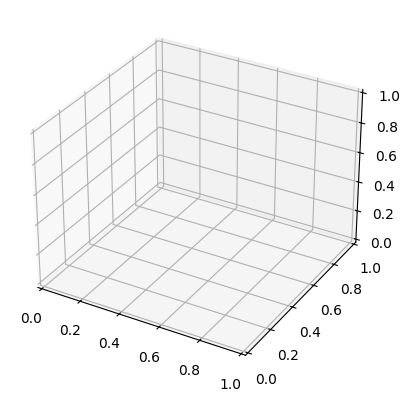

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf',  # Greenish color for XGBoost
    'CNN1D': 'yellow'  # Teal
    
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_L_X, ys=pred_L_X_DT, zs=[1]*len(y_test_L_X), label='Decision Tree', color=colors['Decision Tree'], alpha=0.5)
ax.scatter(xs=y_test_L_X, ys=pred_L_X_GB, zs=[2]*len(y_test_L_X), label='Gradient Boosting', color=colors['Gradient Boosting'], alpha=0.5)
ax.scatter(xs=y_test_L_X, ys=pred_L_X_LR, zs=[3]*len(y_test_L_X), label='Linear Regression', color=colors['Linear Regression'], alpha=0.5)
ax.scatter(xs=y_test_L_X, ys=pred_L_X_MLP, zs=[4]*len(y_test_L_X), label='MLP', color=colors['MLP'], alpha=0.5)
ax.scatter(xs=y_test_L_X, ys=pred_L_X_RF, zs=[5]*len(y_test_L_X), label='Random Forest', color=colors['Random Forest'], alpha=0.5)
ax.scatter(xs=y_test_L_X, ys=pred_L_X_XGB, zs=[6]*len(y_test_L_X), label='XGBoost', color=colors['XGBoost'], alpha=0.5)
ax.scatter(xs=y_test_L_X, ys=pred_L_X_CNN, zs=[6]*len(y_test_L_X), label='CNN1D', color=colors['CNN1D'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('LEFT_X_3D_scatter.png')
plt.show()


NameError: name 'y_test_L_Y' is not defined

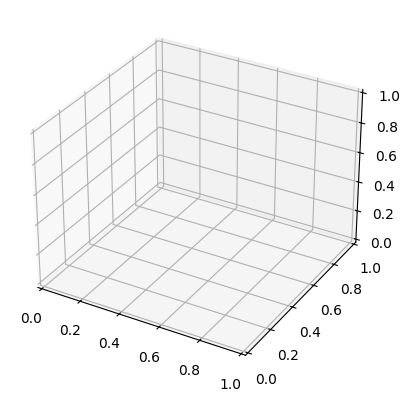

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf',  # Greenish color for XGBoost
    'CNN1D': 'yellow'  # Teal
    
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_DT, zs=[1]*len(y_test_L_Y), label='Decision Tree', color=colors['Decision Tree'], alpha=0.5)
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_GB, zs=[2]*len(y_test_L_Y), label='Gradient Boosting', color=colors['Gradient Boosting'], alpha=0.5)
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_LR, zs=[3]*len(y_test_L_Y), label='Linear Regression', color=colors['Linear Regression'], alpha=0.5)
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_MLP, zs=[4]*len(y_test_L_Y), label='MLP', color=colors['MLP'], alpha=0.5)
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_RF, zs=[5]*len(y_test_L_Y), label='Random Forest', color=colors['Random Forest'], alpha=0.5)
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_XGB, zs=[6]*len(y_test_L_Y), label='XGBoost', color=colors['XGBoost'], alpha=0.5)  # Fixed label for XGBoost
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_CNN, zs=[6]*len(y_test_L_Y), label='CNN1D', color=colors['CNN1D'], alpha=0.5)  # Fixed label for XGBoost

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('LEFT_Y_3D_scatter.png')
plt.show()


NameError: name 'y_test_L_Z' is not defined

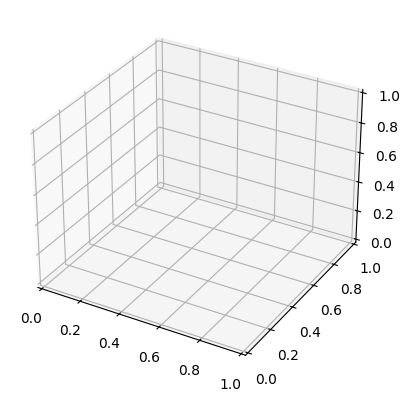

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Elastic Net': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf',  # Greenish color for XGBoost
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_DT, zs=[1]*len(y_test_L_Z), label='Decision Tree', color=colors['Decision Tree'], alpha=0.5)
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_GB, zs=[2]*len(y_test_L_Z), label='Gradient Boosting', color=colors['Gradient Boosting'], alpha=0.5)
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_ENR, zs=[3]*len(y_test_L_Z), label='Elastic Net', color=colors['Elastic Net'], alpha=0.5)
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_MLP, zs=[4]*len(y_test_L_Z), label='MLP', color=colors['MLP'], alpha=0.5)
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_RF, zs=[5]*len(y_test_L_Z), label='Random Forest', color=colors['Random Forest'], alpha=0.5)
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_XGB, zs=[6]*len(y_test_L_Z), label='XGBoost', color=colors['XGBoost'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('LEFT_Z_3D_scatter.png')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1767000,) and arg 1 with shape (1413600,).

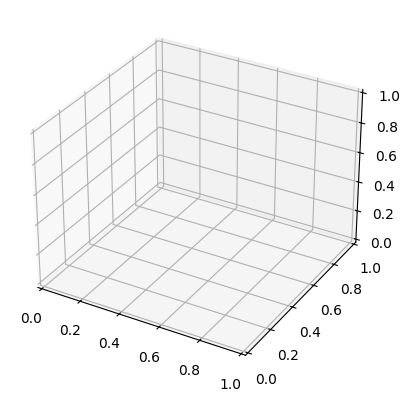

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
cmap = plt.get_cmap('tab10')

# Define colors for each scatter plot using the color map
colors = {
    'Decision Tree': cmap(0),      # Soft blue
    'Gradient Boosting': cmap(1),  # Soft orange
    'Linear Regression': cmap(2),  # Soft green
    'MLP': cmap(3),                # Soft red
    'Random Forest': cmap(4),      # Soft purple
    'XGBoost': cmap(5),             # Soft brown
    'CNN1D': cmap(6)             # Soft brown
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_R_X, ys=pred_R_X_DT, zs=[1]*len(y_test_R_X), label='Decision Tree', color=colors['Decision Tree'], alpha=0.5)
ax.scatter(xs=y_test_R_X, ys=pred_R_X_GB, zs=[2]*len(y_test_R_X), label='Gradient Boosting', color=colors['Gradient Boosting'], alpha=0.5)
# ax.scatter(xs=y_test_R_X, ys=pred_R_X_ENR, zs=[3]*len(y_test_R_X), label='Elastic Net', color=colors['Elastic Net'], alpha=0.5)
# ax.scatter(xs=y_test_R_X, ys=pred_R_X_LASSO, zs=[4]*len(y_test_R_X), label='LASSO', color=colors['LASSO'], alpha=0.5)
ax.scatter(xs=y_test_R_X, ys=pred_R_X_LR, zs=[5]*len(y_test_R_X), label='Linear Regression', color=colors['Linear Regression'], alpha=0.5)
ax.scatter(xs=y_test_R_X, ys=pred_R_X_MLP, zs=[6]*len(y_test_R_X), label='MLP', color=colors['MLP'], alpha=0.5)
ax.scatter(xs=y_test_R_X, ys=pred_R_X_RF, zs=[7]*len(y_test_R_X), label='Random Forest', color=colors['Random Forest'], alpha=0.5)
# ax.scatter(xs=y_test_R_X, ys=pred_R_X_CAT, zs=[8]*len(y_test_R_X), label='Catboost', color=colors['Catboost'], alpha=0.5)
ax.scatter(xs=y_test_R_X, ys=pred_R_X_XGB, zs=[9]*len(y_test_R_X), label='XGBoost', color=colors['XGBoost'], alpha=0.5)
ax.scatter(xs=y_test_R_X, ys=pred_R_X_CNN, zs=[9]*len(y_test_R_X), label='CNN1D', color=colors['CNN1D'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('RIGHT_X_3D_scatter.png')
plt.show()


/tmp/ipykernel_1197189/2458381524.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('RIGHT_Y_3D_scatter.png')
/home/latis/step-length-prediction/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


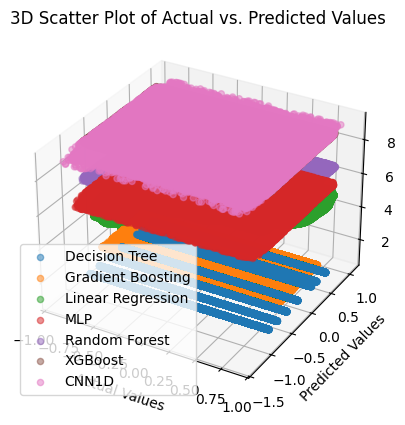

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
cmap = plt.get_cmap('tab10')

# Define colors for each scatter plot using the color map
colors = {
    'Decision Tree': cmap(0),      # Soft blue
    'Gradient Boosting': cmap(1),  # Soft orange
    'Linear Regression': cmap(2),  # Soft green
    'MLP': cmap(3),                # Soft red
    'Random Forest': cmap(4),      # Soft purple
    'XGBoost': cmap(5),             # Soft brown
    'CNN1D': cmap(6)             # Soft brown
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_DT, zs=[1]*len(y_test_R_Y), label='Decision Tree', color=colors['Decision Tree'], alpha=0.5)
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_GB, zs=[2]*len(y_test_R_Y), label='Gradient Boosting', color=colors['Gradient Boosting'], alpha=0.5)
# ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_ENR, zs=[3]*len(y_test_R_Y), label='Elastic Net', color=colors['Elastic Net'], alpha=0.5)
# ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_LASSO, zs=[4]*len(y_test_R_Y), label='LASSO', color=colors['LASSO'], alpha=0.5)
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_LR, zs=[5]*len(y_test_R_Y), label='Linear Regression', color=colors['Linear Regression'], alpha=0.5)
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_MLP, zs=[6]*len(y_test_R_Y), label='MLP', color=colors['MLP'], alpha=0.5)
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_RF, zs=[7]*len(y_test_R_Y), label='Random Forest', color=colors['Random Forest'], alpha=0.5)
# ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_CAT, zs=[8]*len(y_test_R_Y), label='Catboost', color=colors['Catboost'], alpha=0.5)
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_XGB, zs=[9]*len(y_test_R_Y), label='XGBoost', color=colors['XGBoost'], alpha=0.5)
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_CNN, zs=[9]*len(y_test_R_Y), label='CNN1D', color=colors['CNN1D'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('RIGHT_Y_3D_scatter.png')
plt.show()


/tmp/ipykernel_1197189/464893087.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('RIGHT_Z_3D_scatter.png')


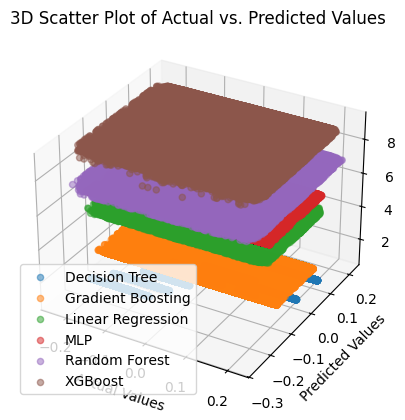

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
cmap = plt.get_cmap('tab10')

# Define colors for each scatter plot using the color map
colors = {
    'Decision Tree': cmap(0),      # Soft blue
    'Gradient Boosting': cmap(1),  # Soft orange
    'Linear Regression': cmap(2),  # Soft green
    'MLP': cmap(3),                # Soft red
    'Random Forest': cmap(4),      # Soft purple
    'XGBoost': cmap(5)             # Soft brown
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_DT, zs=[1]*len(y_test_R_Z), label='Decision Tree', color=colors['Decision Tree'], alpha=0.5)
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_GB, zs=[2]*len(y_test_R_Z), label='Gradient Boosting', color=colors['Gradient Boosting'], alpha=0.5)
# ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_ENR, zs=[3]*len(y_test_R_Z), label='Elastic Net', color=colors['Elastic Net'], alpha=0.5)
# ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_LASSO, zs=[4]*len(y_test_R_Z), label='LASSO', color=colors['LASSO'], alpha=0.5)
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_LR, zs=[5]*len(y_test_R_Z), label='Linear Regression', color=colors['Linear Regression'], alpha=0.5)
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_MLP, zs=[6]*len(y_test_R_Z), label='MLP', color=colors['MLP'], alpha=0.5)
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_RF, zs=[7]*len(y_test_R_Z), label='Random Forest', color=colors['Random Forest'], alpha=0.5)
# ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_CAT, zs=[8]*len(y_test_R_Z), label='Catboost', color=colors['Catboost'], alpha=0.5)
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_XGB, zs=[9]*len(y_test_R_Z), label='XGBoost', color=colors['XGBoost'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('RIGHT_Z_3D_scatter.png')
plt.show()


In [95]:
# prompt: modify this scatter plot, to plot, y_test, with prediction of mulitple model, pred_nn, pred, forest, pred_cat, pred_xgb:

plt.scatter(y_test, pred_nn, alpha=0.5, label='MLP')
# plt.scatter(y_test, pred, alpha=0.5, label='LSTM')
plt.scatter(y_test, pred_forest, alpha=0.5, label='RF')
plt.scatter(y_test, pred_cat, alpha=0.5, label='CatBoost')
plt.scatter(y_test, pred_xgb, alpha=0.5, label='XGBoost')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

NameError: name 'pred_nn' is not defined

In [ ]:
import matplotlib.pyplot as plt

# # Example data
# y_test = [3, 4, 5, 6, 7]  # Replace with your actual y_test values
# predictions = [2.8, 3.9, 5.1, 6.2, 6.8]  # Replace with your actual prediction values
# xs=y_test_R_X, ys=pred_R_X_XGB
# Plotting
plt.figure(figsize=(8, 6))
# plt.scatter(pred_R_Y_LR, pred_R_Y_LR, color='blue', label='Predictions vs. y_test')
plt.plot(y_test_R_X, y_test_R_X, color='red', linewidth=3, linestyle='--', label='Ideal Prediction Line')
plt.plot(pred_R_Y_XGB, pred_R_Y_XGB, color='blue', linewidth=1, linestyle='--', label='pred Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define x values from 0 to 100
# Define x values from 0 to 100
x = np.linspace(0, 100, num=101)

# Example y_test values. Replace this with your actual y_test data.
y_test = np.sin(x)  # Example function; replace with your actual data

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_test_R_X[100:201], label='y_test values', color='b')
plt.plot(x, pred_R_X_LR[100:201], label='pred_R_X_LR values', color='r')
plt.plot(x, pred_R_X_MLP[100:201], label='pred_R_X_MLP values', color='g')
plt.plot(x, pred_R_X_XGB[100:201], label='pred_R_X_XGB values', color='y')
plt.plot(x, pred_R_X_RF[100:201], label='pred_R_X_RF values', color='black')
plt.xlabel('x')
plt.ylabel('y_test')
plt.title('Plot of y_test vs. x')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_test = [3, 4, 5, 6, 7]  # Replace with your actual y_test values
predictions = [2.8, 3.9, 5.1, 6.2, 6.8]  # Replace with your actual prediction values

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions vs. y_test')
plt.plot(y_test, y_test, color='red', linewidth=2, linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
é